# HEART DISEASE CLASSIFICATION 

PROJECT CONTENT 
 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 

In [2]:
%matplotlib inline 

In [3]:
data = pd.read_csv("heart.csv")
data

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
0      0      1       1  
1      0      2       1  
2      0      2       1  
3      0      2       1  
4      0      2       1  
..   ...    ...     ...  
298    0      3       0  
299    0      3       0  
300    2      3       0  
301    1      3       0  
302    1      2       0  

[303 rows x 14 columns]

# Start of our initial analysis on our dataset 

In [4]:
data.head(10)

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   
5   57    1   0     140   192    0        1       148     0      0.4    1   
6   56    0   1     140   294    0        0       153     0      1.3    1   
7   44    1   1     120   263    0        1       173     0      0.0    2   
8   52    1   2     172   199    1        1       162     0      0.5    2   
9   57    1   2     150   168    0        1       174     0      1.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  
5    0      1       1  
6    0      2       1  
7    0      3       1  
8    0      3       1  
9    0      2       1

In [5]:
print("Shape:", data.shape)

Shape: (303, 14)


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


First case analysis: 
1. dataset contains 303 rows and 14 columns
2. Type of the attributes is in numerical format either integer or float 
3. There is no NaN value (missing value) in the dataset 


# Preparation for EDA 

Examining missing values 

In [7]:
isnull_number=[]
for i in data.columns: 
    x = data[i].isnull().sum()
    isnull_number.append(x)
    
pd.DataFrame(isnull_number, index = data.columns, columns = ["Total Missing values"])

Total Missing values
age                          0
sex                          0
cp                           0
trtbps                       0
chol                         0
fbs                          0
restecg                      0
thalachh                     0
exng                         0
oldpeak                      0
slp                          0
caa                          0
thall                        0
output                       0

In [8]:
!pip install missingno

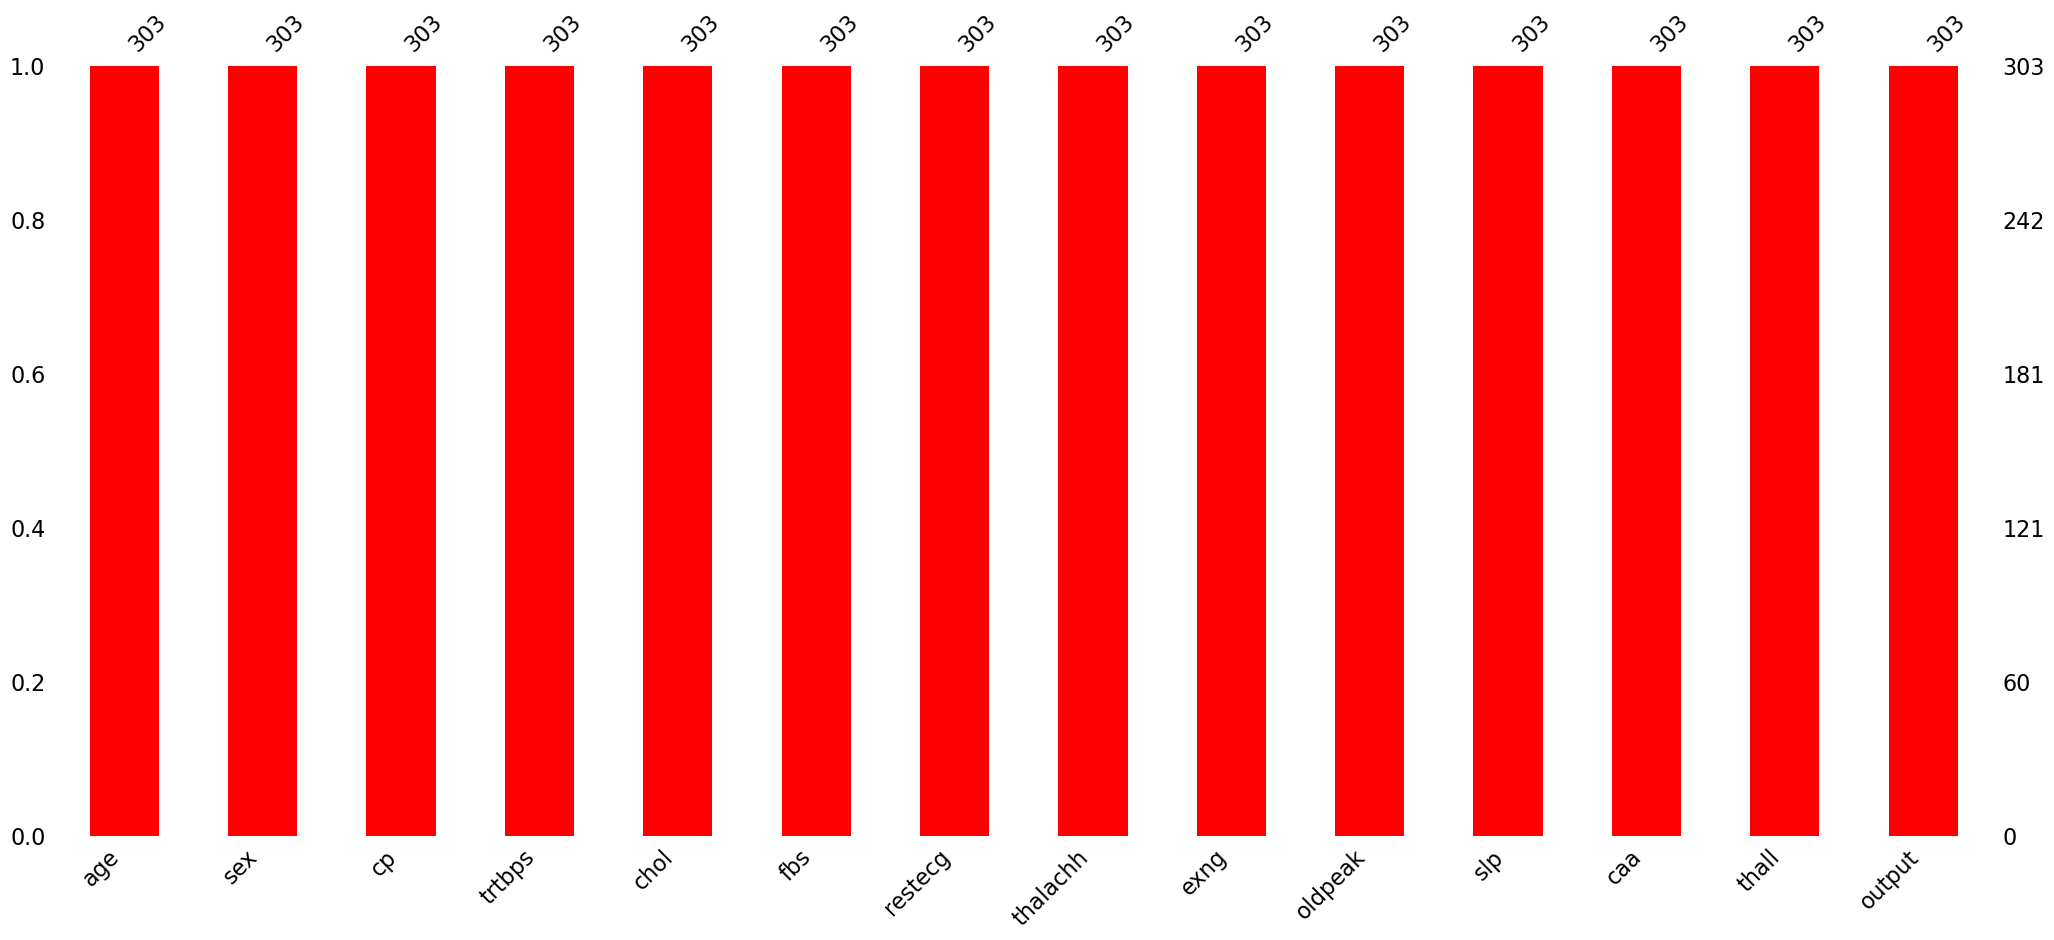

In [9]:
import missingno
missingno.bar(data, color = "r")
plt.show()

Examining unique values 

In [10]:
data.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [11]:
unique_value = []
for i in data.columns: 
    x = data[i].value_counts().count()
    unique_value.append(x)

pd.DataFrame(unique_value, index = data.columns, columns = ["Total unique values"])

Total unique values
age                        41
sex                         2
cp                          4
trtbps                     49
chol                      152
fbs                         2
restecg                     3
thalachh                   91
exng                        2
oldpeak                    40
slp                         3
caa                         5
thall                       4
output                      2

Analysis 2 : 
1.  few unique values as categorical variables such as "sex", "cp", "fbs", "rest_ecg", "exang", "slope", "ca", "thal", "target"
2. high unique values as numeric variables such as “age”, “trtbps”, “chol”, “thalach” and “oldpeak ”



Separation of numeric and categorical variables 

In [12]:
data.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [13]:
numeric_var = ["age", "trtbps", "chol", "thalachh", "oldpeak"]
categoric_var = ["sex", "cp", "fbs", "restecg", "exng", "slp", "caa", "thall", "output"]

# Analyzing statistics of Variables 

In [14]:
data[numeric_var].describe()

age      trtbps        chol    thalachh     oldpeak
count  303.000000  303.000000  303.000000  303.000000  303.000000
mean    54.366337  131.623762  246.264026  149.646865    1.039604
std      9.082101   17.538143   51.830751   22.905161    1.161075
min     29.000000   94.000000  126.000000   71.000000    0.000000
25%     47.500000  120.000000  211.000000  133.500000    0.000000
50%     55.000000  130.000000  240.000000  153.000000    0.800000
75%     61.000000  140.000000  274.500000  166.000000    1.600000
max     77.000000  200.000000  564.000000  202.000000    6.200000

Age variable is prone to the normal distribution 
1. Mean = 54; the average of minimum and maximum values. 
2. Looking at the quartiles, the data average is in the middle of 25% and 75% quartiles -> so age variable is prone to the normal distribution 

C:\Users\Harip\AppData\Local\Temp\ipykernel_24336\1297377065.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["age"], hist_kws = dict(linewidth = 1, edgecolor = "k"));


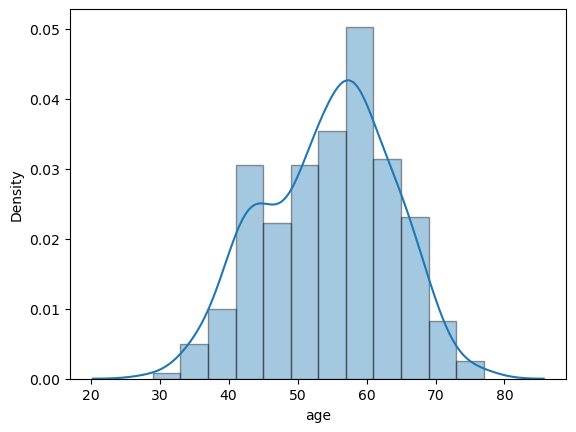

In [15]:
sns.distplot(data["age"], hist_kws = dict(linewidth = 1, edgecolor = "k"));

C:\Users\Harip\AppData\Local\Temp\ipykernel_24336\855843701.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["trtbps"], hist_kws = dict(linewidth = 1, edgecolor = "k"), bins = 20);


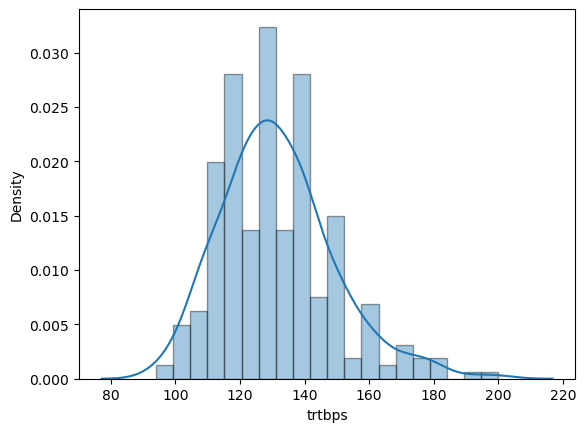

In [16]:
#for trtbps variable 
sns.distplot(data["trtbps"], hist_kws = dict(linewidth = 1, edgecolor = "k"), bins = 20);

1. The minimum value for the "trtbps" variable is 94, and the maximum value is 200. The average of these two numbers is 147.

2. Major average is 131 

3. no much diff b/w 131 and 147. So "trtbps" tends to be normally distributed 

4. when we take the midpoint of the minimum value and the maximum value as a basis, the data on the left is more than on the right.

5. small skew towards the right side due to the lack of data on the right side 

6. Summarizing, this data is prone to normal distribution, but there is a slight right skew

C:\Users\Harip\AppData\Local\Temp\ipykernel_24336\1545393511.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["chol"], hist = False);


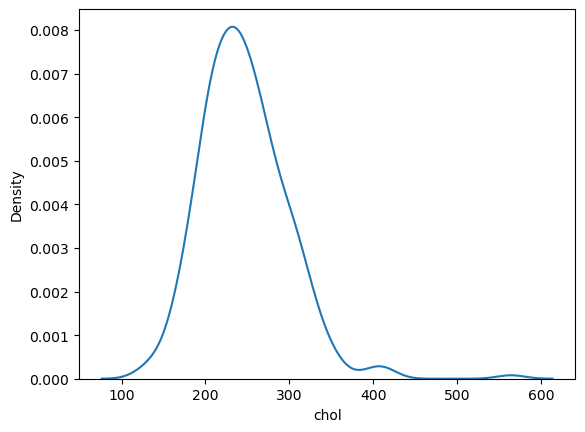

In [17]:
# for "chol" variable 
sns.distplot(data["chol"], hist = False);

The minimum value for the "chol" variable is 126, and the maximum is 564. The middle of these two values is 345.
The major average is 246.
When viewed, the mean is slight to the left of the midpoint of the minimum and maximum value.
Let's check the quartiles. There are values up to 274 in the first 75 percent. Considering that the maximum value is 564, we see that most of the data is on the left.
So data is slightly skewed to the right due to values that outlier

C:\Users\Harip\AppData\Local\Temp\ipykernel_24336\3597720496.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["thalachh"], hist = False, ax = y)


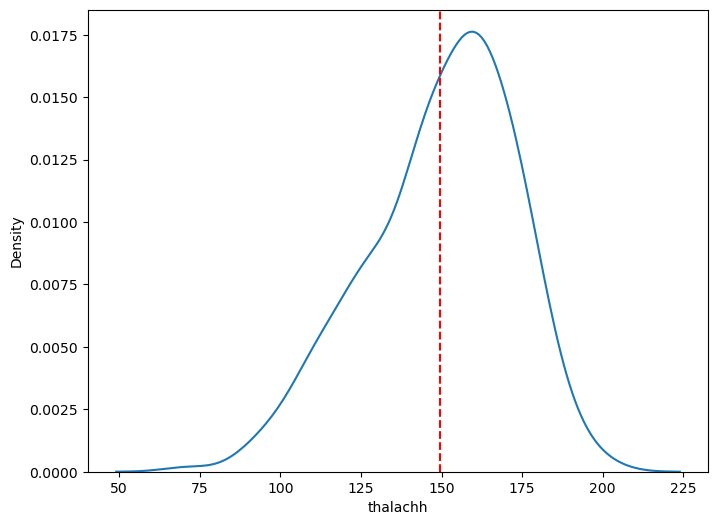

In [18]:
# "thalachh" variable
x, y = plt.subplots(figsize = (8, 6))
sns.distplot(data["thalachh"], hist = False, ax = y)
y.axvline(data["thalachh"].mean(), color = "r", ls = "--");

The minimum value of the "thalach" variable is 71. The maximum value is 202. According to these two values, the midpoint value is 137.
The central average is 149.6
So there is a left skew, although not much.
When we examine the quartiles, The 25%, 50%, and 75% sections between the minimum and maximum values are homogeneously distributed.
As a result, the data tends to be normally distributed, but there is a slight left skew.

C:\Users\Harip\AppData\Local\Temp\ipykernel_24336\3973996973.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["oldpeak"], hist_kws = dict(linewidth = 1, edgecolor = "k"), bins = 20, ax = y)


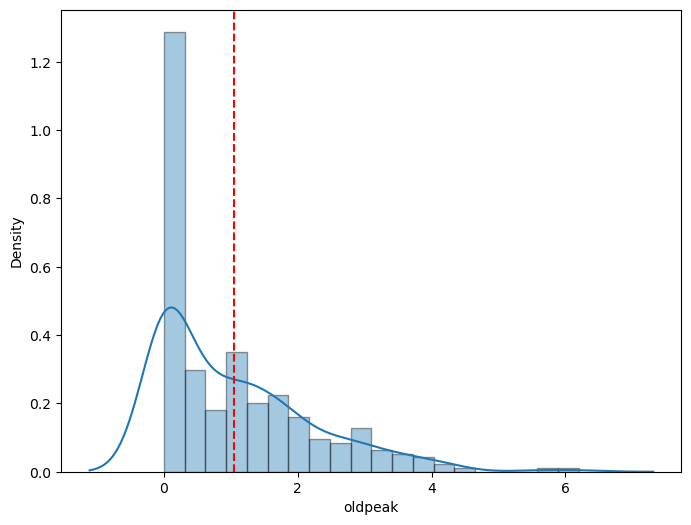

In [19]:
# "oldpeak" variable
x, y = plt.subplots(figsize = (8, 6))
sns.distplot(data["oldpeak"], hist_kws = dict(linewidth = 1, edgecolor = "k"), bins = 20, ax = y)
y.axvline(data["oldpeak"].mean(), color = "r", ls = "--");

The minimum value of the "oldpeak" variable is 0, the maximum value is 6.20, so the middle point according to these two values is 3.10
When we look at the mean, we see that it is 1.03
When we examine the quartiles, 75% of the data consists of values up to 1.60
This shows that; There is an incredible right skew in the data.

## Exploratory Data Analysis(EDA) 

-> Uni-variate Analysis 

In [20]:
#Numerical varaibles(Analysis with Distplot)

numeric_var

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

In [21]:
numeric_axis_name = ["Age of the Patient", "Resting Blood Pressure", "Cholesterol", "Maximum Heart Rate Achieved", "ST Depression"]

In [22]:
list(zip(numeric_var, numeric_axis_name))

[('age', 'Age of the Patient'),
 ('trtbps', 'Resting Blood Pressure'),
 ('chol', 'Cholesterol'),
 ('thalachh', 'Maximum Heart Rate Achieved'),
 ('oldpeak', 'ST Depression')]

C:\Users\Harip\AppData\Local\Temp\ipykernel_24336\4165583939.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i], hist_kws = dict(linewidth = 1, edgecolor = "k"), bins = 20)


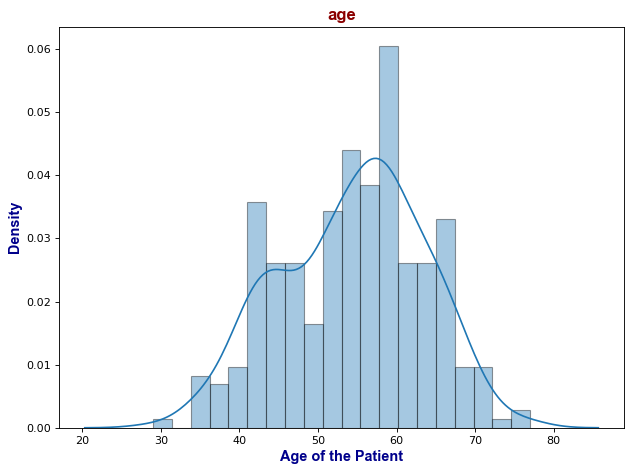

C:\Users\Harip\AppData\Local\Temp\ipykernel_24336\4165583939.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i], hist_kws = dict(linewidth = 1, edgecolor = "k"), bins = 20)


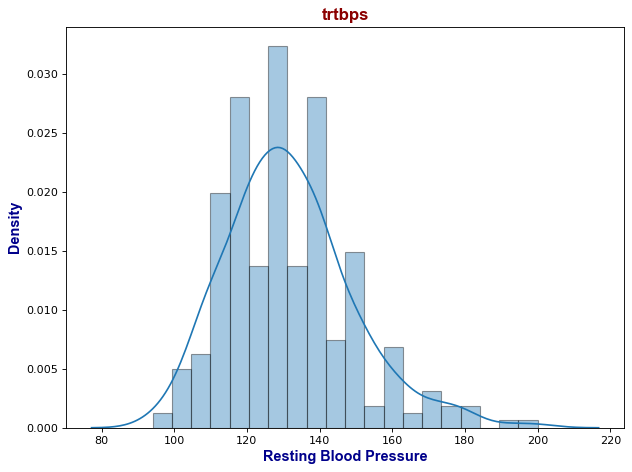

C:\Users\Harip\AppData\Local\Temp\ipykernel_24336\4165583939.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i], hist_kws = dict(linewidth = 1, edgecolor = "k"), bins = 20)


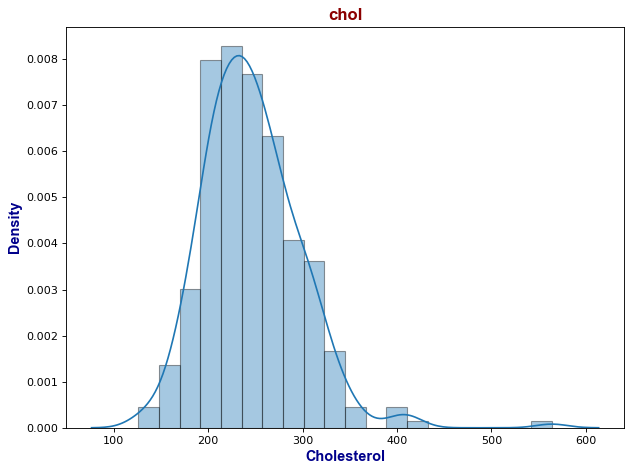

C:\Users\Harip\AppData\Local\Temp\ipykernel_24336\4165583939.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i], hist_kws = dict(linewidth = 1, edgecolor = "k"), bins = 20)


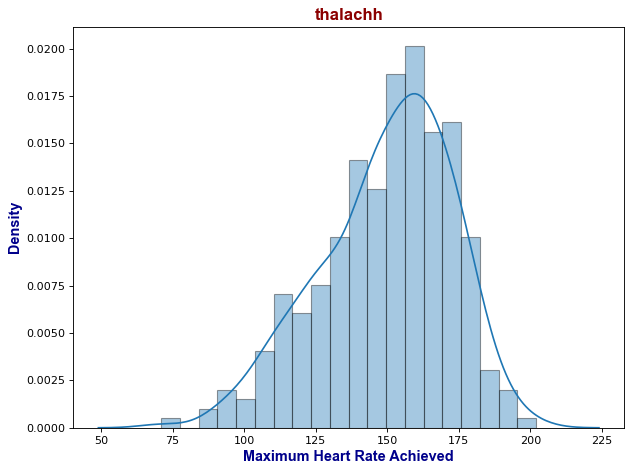

C:\Users\Harip\AppData\Local\Temp\ipykernel_24336\4165583939.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i], hist_kws = dict(linewidth = 1, edgecolor = "k"), bins = 20)


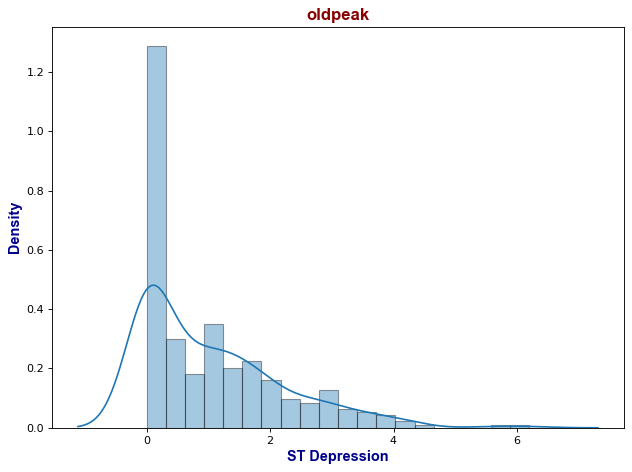

In [23]:
title_font = {"family" : "arial", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"family" : "arial", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i, z in list(zip(numeric_var, numeric_axis_name)):
    plt.figure(figsize = (8, 6), dpi = 80)
    sns.distplot(data[i], hist_kws = dict(linewidth = 1, edgecolor = "k"), bins = 20)
    
    plt.title(i, fontdict = title_font)
    plt.xlabel(z, fontdict = axis_font)
    plt.ylabel("Density", fontdict = axis_font)
    
    plt.tight_layout()
    plt.show()

#analysis output for numerical variables 

1. Age Variable
-> The vast majority of patients are between 50 and 60.
-> There is a remarkable place on the chart. There is a decrease in patients between the ages of 47-and 50.
-> It looks like there are no outliers in the variable.
2. Trtbps Variable
-> The resting blood pressure of most patients is generally between 110 and 140.
-> Values after 180 can be considered as outliers.
-> There is hefty patient traffic between 115-120, 125-130, and 155-160 values.
3. Cholesterol Variable
-> Cholesterol value in most patients is between 200-and 280.
Values after 380 can be considered as outliers.
4. Thalach Variable
-> The maximum heart rate achieved in most patients is between 145-and 170.
->In particular, The values before 80 can be considered outliers.
5. Oldpeak Variable
->Values of the vast majority of patients in the variable range from 0 to 1.5.
->Especially values after 2.5 can be considered as outliers.

In [24]:
#Categorical variable(Analysis with Pie-Chart)
categoric_var

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

In [25]:
categoric_axis_name = ["Gender", "Chest Pain Type", "Fasting Blood sugar", "Resting Electrocardiographic Results",
                      "Exercise Induced Angina", "The Slope of ST Segment", "Number of Major Vessels", "Thal", "Target"]

In [26]:
list(zip(categoric_var, categoric_axis_name))

[('sex', 'Gender'),
 ('cp', 'Chest Pain Type'),
 ('fbs', 'Fasting Blood sugar'),
 ('restecg', 'Resting Electrocardiographic Results'),
 ('exng', 'Exercise Induced Angina'),
 ('slp', 'The Slope of ST Segment'),
 ('caa', 'Number of Major Vessels'),
 ('thall', 'Thal'),
 ('output', 'Target')]

In [27]:
data["cp"].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [28]:
list(data["cp"].value_counts())

[143, 87, 50, 23]

In [29]:
list(data["cp"].value_counts().index)

[0, 2, 1, 3]

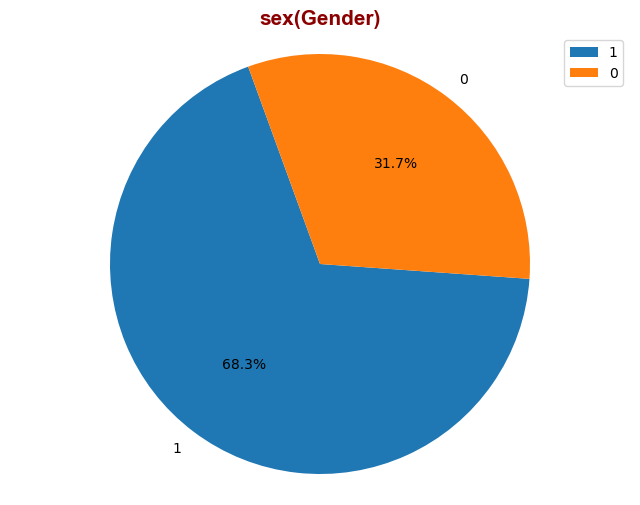

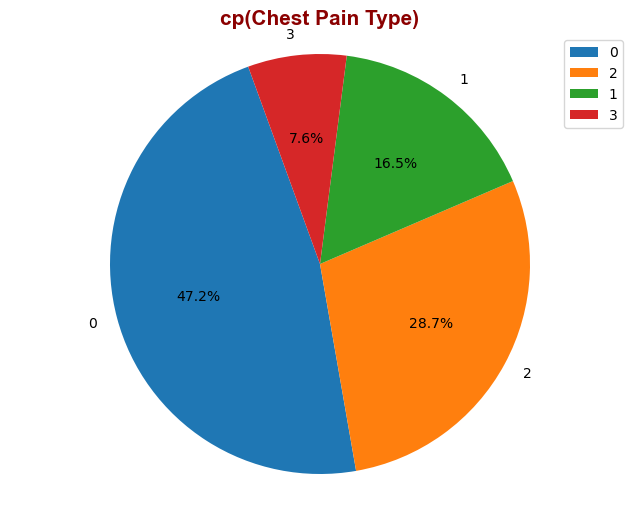

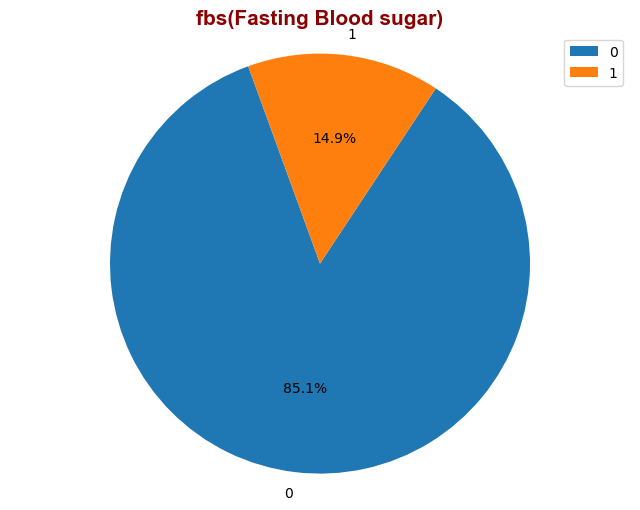

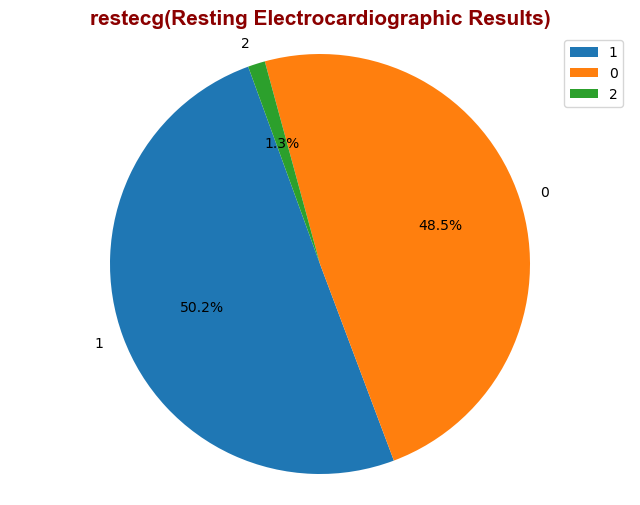

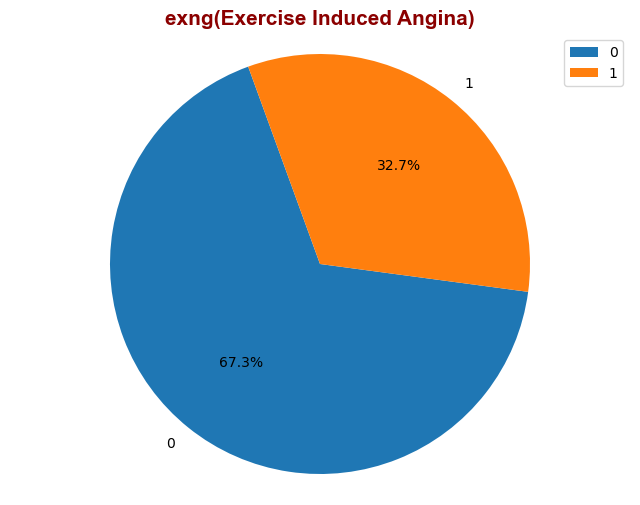

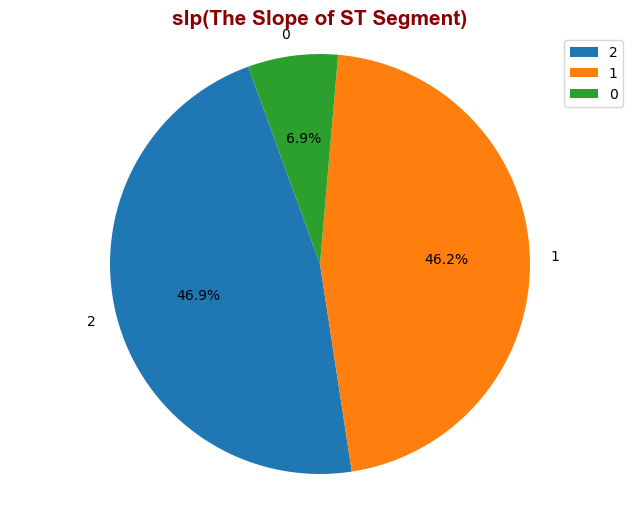

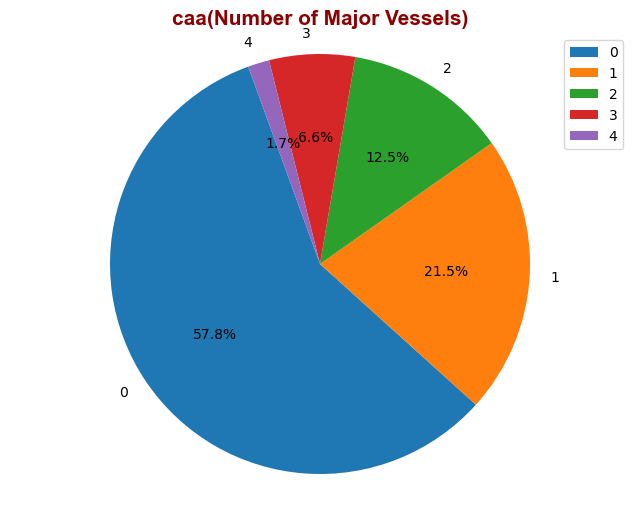

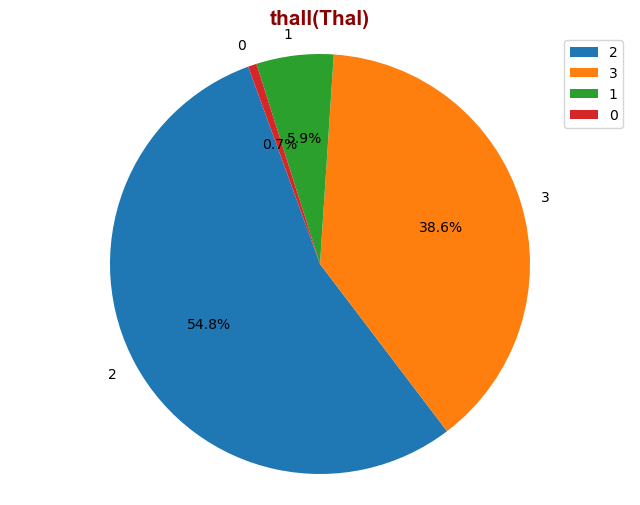

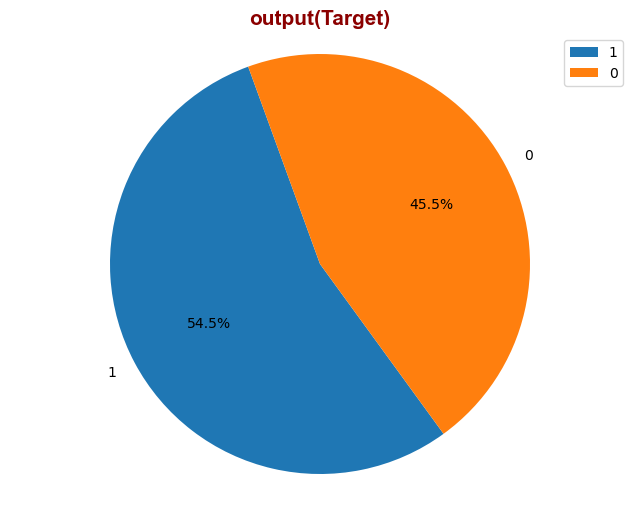

In [30]:
title_font = {"family" : "arial", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"family" : "arial", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i, z in list(zip(categoric_var, categoric_axis_name)):
    fig, ax = plt.subplots(figsize = (8, 6))
    
    observation_values = list(data[i].value_counts().index)
    total_observation_values = list(data[i].value_counts())
    
    ax.pie(total_observation_values, labels= observation_values, autopct = '%1.1f%%', startangle = 110, labeldistance = 1.1)
    ax.axis("equal") # Equal aspect ratio ensures that pie is drawn as a circle.
    
    plt.title((i + "(" + z + ")"), fontdict = title_font) # Naming Pie Chart Titles
    plt.legend()
    plt.show()

In [31]:
# Analysis output for categorical variables are included in the document 


In [32]:
##Examining the Missing Data According to the Analysis Result

data[data["thall"] == 0]

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
48    53    0   2     128   216    0        0       115     0      0.0    2   
281   52    1   0     128   204    1        1       156     1      1.0    1   

     caa  thall  output  
48     0      0       1  
281    0      0       0

In [33]:
data["thall"] = data["thall"].replace(0, np.nan)

In [34]:
data.loc[[48, 281], :]

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
48    53    0   2     128   216    0        0       115     0      0.0    2   
281   52    1   0     128   204    1        1       156     1      1.0    1   

     caa  thall  output  
48     0    NaN       1  
281    0    NaN       0

In [35]:
isnull_number = []
for i in data.columns:
    x = data[i].isnull().sum()
    isnull_number.append(x)
    
pd.DataFrame(isnull_number, index = data.columns, columns = ["Total Missing Values"])

Total Missing Values
age                          0
sex                          0
cp                           0
trtbps                       0
chol                         0
fbs                          0
restecg                      0
thalachh                     0
exng                         0
oldpeak                      0
slp                          0
caa                          0
thall                        2
output                       0

In [36]:
data["thall"].fillna(2, inplace = True)

In [37]:
data.loc[[48, 281], :]

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
48    53    0   2     128   216    0        0       115     0      0.0    2   
281   52    1   0     128   204    1        1       156     1      1.0    1   

     caa  thall  output  
48     0    2.0       1  
281    0    2.0       0

In [38]:
data

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
0      0    1.0       1  
1      0    2.0       1  
2      0    2.0       1  
3      0    2.0       1  
4      0    2.0       1  
..   ...    ...     ...  
298    0    3.0       0  
299    0    3.0       0  
300    2    3.0       0  
301    1    3.0       0  
302    1    2.0       0  

[303 rows x 14 columns]

In [39]:
data["thall"] = pd.to_numeric(data["thall"], downcast = "integer")

In [40]:
data.loc[[48, 281], :]

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
48    53    0   2     128   216    0        0       115     0      0.0    2   
281   52    1   0     128   204    1        1       156     1      1.0    1   

     caa  thall  output  
48     0      2       1  
281    0      2       0

In [41]:
isnull_number = []
for i in data.columns:
    x = data[i].isnull().sum()
    isnull_number.append(x)
    
pd.DataFrame(isnull_number, index = data.columns, columns = ["Total Missing Values"])

Total Missing Values
age                          0
sex                          0
cp                           0
trtbps                       0
chol                         0
fbs                          0
restecg                      0
thalachh                     0
exng                         0
oldpeak                      0
slp                          0
caa                          0
thall                        0
output                       0

In [42]:
data["thall"].value_counts()

2    168
3    117
1     18
Name: thall, dtype: int64

## Bi-Variate Analysis 

#numerical variables - Target variable

In [43]:
numeric_var

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

In [44]:
numeric_var.append("output")

In [45]:
numeric_var

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'output']

C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


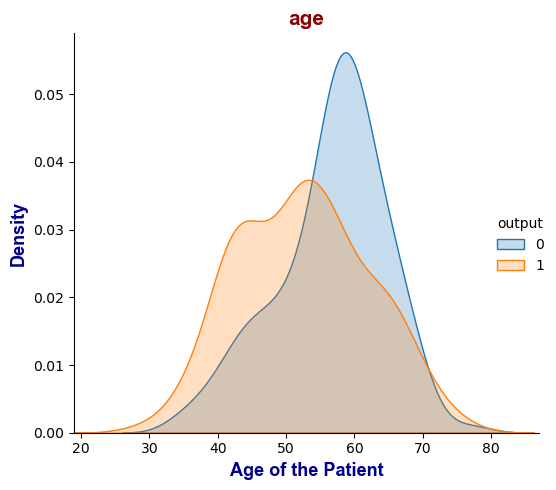

C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


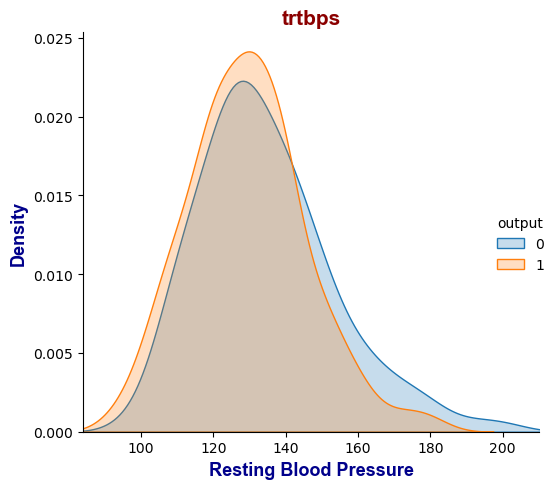

C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


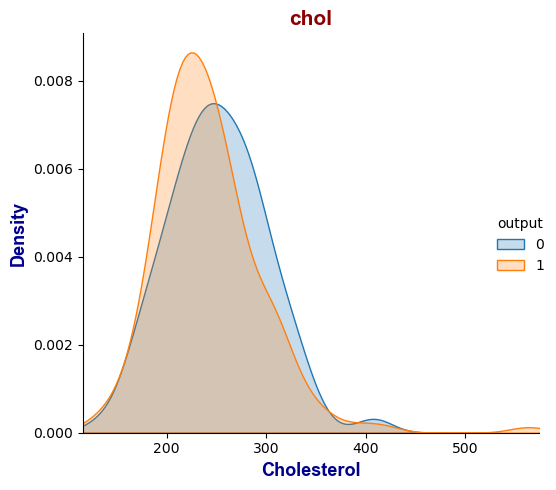

C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


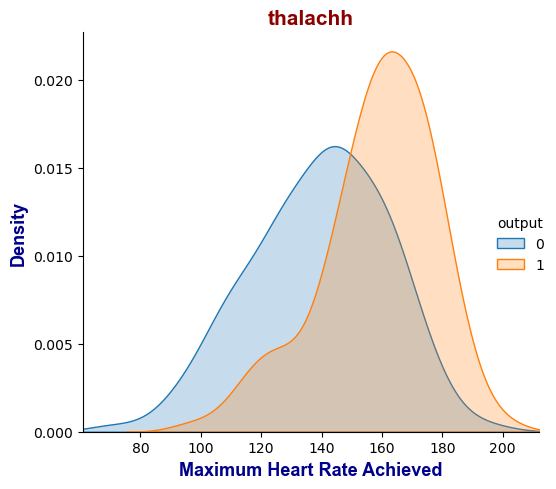

C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


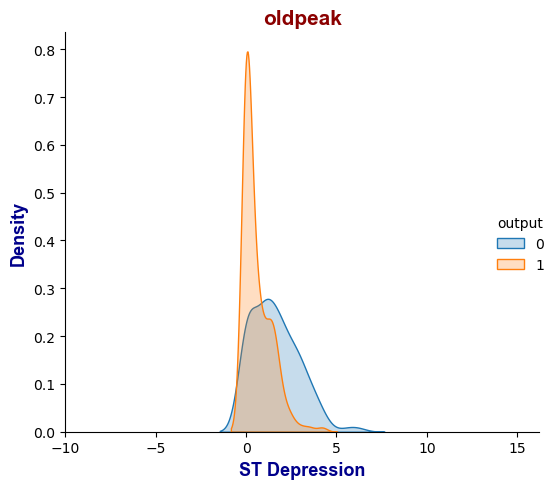

In [46]:
title_font = {"family" : "arial", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"family" : "arial", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i, z in list(zip(numeric_var, numeric_axis_name)):
    graph = sns.FacetGrid(data, hue = "output", height = 5, xlim = ((data[i].min() - 10), (data[i].max() + 10)))
    graph.map(sns.kdeplot, i, shade = True)
    graph.add_legend()
    
    plt.title(i, fontdict = title_font)
    plt.xlabel(z, fontdict = axis_font)
    plt.ylabel("Density", fontdict = axis_font)
    
    plt.tight_layout()
    plt.show()

In [47]:
numeric_var

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'output']

In [48]:
numeric_var = ['age','trtbps','chol','thalachh','oldpeak','output']


In [49]:
data[numeric_var].corr()


age    trtbps      chol  thalachh   oldpeak    output
age       1.000000  0.279351  0.213678 -0.398522  0.210013 -0.225439
trtbps    0.279351  1.000000  0.123174 -0.046698  0.193216 -0.144931
chol      0.213678  0.123174  1.000000 -0.009940  0.053952 -0.085239
thalachh -0.398522 -0.046698 -0.009940  1.000000 -0.344187  0.421741
oldpeak   0.210013  0.193216  0.053952 -0.344187  1.000000 -0.430696
output   -0.225439 -0.144931 -0.085239  0.421741 -0.430696  1.000000

In [50]:
data[numeric_var].corr().iloc[:, [-1]]

output
age      -0.225439
trtbps   -0.144931
chol     -0.085239
thalachh  0.421741
oldpeak  -0.430696
output    1.000000

Analysis on Bi-variate(Numeric) 

The KDE plot shows the density of the feature for each value of the target variable. 
There are usually two-colored humps representing the two values of the Target variable. 
If the humps are well-separated and non-overlapping, there is a correlation with the Target. If the humps overlap a lot, that means the feature is not well-correlated with the Target because the Target is equally as common on those values of the feature.

1. Age - Target Variable

1. There is some interesting data in this chart.Typically, the general belief is that heart attack increases with age.
2. However, the graph tells us that we are wrong about this.
3. If you have noticed, the number of people at risk of heart attack decreases as age progresses.
4. Let's take 55 as a base. There is an incredible increase in the blue graph after 55. In other words, there is a decrease in heart attack risk after the age of 55.
5. On the contrary, a decrease occurs after 55 in the orange graph. In other words, there is a decrease in the risk of heart attack after the age of 55.
6. To summarize, It's just a general thought that older people may be more likely to have a heart attack, but from a graph of the age and target distribution, it's clear that this isn't the case.
7. And correlation between them -0.225439. There is a negative correlation, which we can call little.

2. Trtbps - Target Variable

1. It is complicated to predict whether a patient will have a heart attack from resting blood pressure data.
2. Because if you notice, the two graphs are almost identical. For example, according to the "trtbps" value of two possibilities, 130 is the maximum point.
3. Also, the Bumps on the graph overlap too much.This means that the feature does not correlate well with the Target variable. So, in summary, A patient with a "trtbps" value of 130 may or may not be likely to have a heart attack.
4. And according to the graph, we can say that there is little correlation between the two variables. Correlation between them -0.144931. There is a negative correlation, which we can call little.

3. Chol - Target Variable

1. In the graph, we can say that a cholesterol value of 200-250 is precarious for the patients.
2. If you have noticed, especially at the beginning of the graph, patients with and without heart attack risk a similar image, while the increase in the probability of having a heart attack from 180 to 250 is noticeable.
3. After the value of 250, it becomes difficult to differentiate the probability of patients having a heart attack.

->The correlation between the two variables is -0.085239. In other words, we can say that it is negative, but very little.

4. Thalach - Target Variable

1. There is a situation that is evident in this graph.The higher the maximum reached heart rate, the higher the probability of the patient having a heart attack.
2. If you have noticed, there is a parallel increase in the two possibilities up to 150. However, after a value of 150, patients with a low probability of having a heart attack decrease, while patients with a high-risk probability increase incredibly.

3. It is evident in the distinction between the two bumps in the graph. This indicates that there is a correlation between the two variables.
-> The correlation between the two variables is 0.421741. In other words, we can say that it is positive and moderate.

5. Oldpeak - Target Variable

1. When we look at the graph, if the value of this variable is between 0 and 1.5, there is a significant increase in the probability of having a heart attack.
2. We can say that the range of 0 to 1.5 is the critical threshold for us.
3. It is evident in the distinction between the two bumps in the graph. This indicates a correlation between the two variables.
4. The correlation between the two variables is -0.430696. In other words, we can say that it is negative and moderate.

In [51]:
#Categorical variables - Target Variable

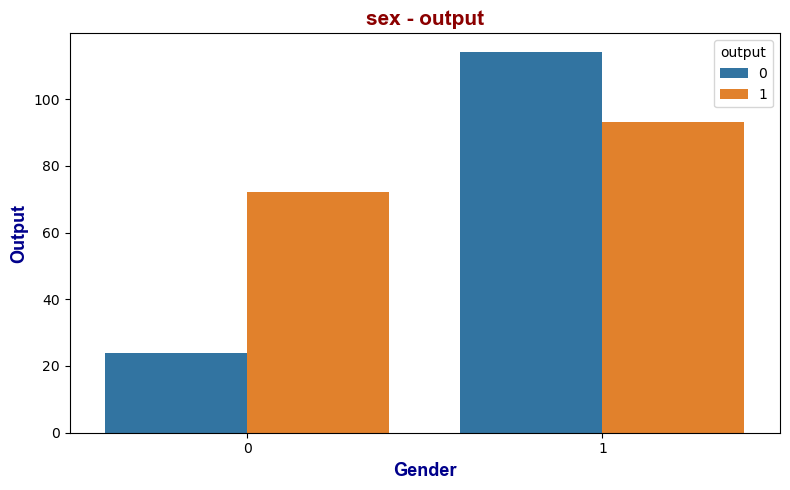

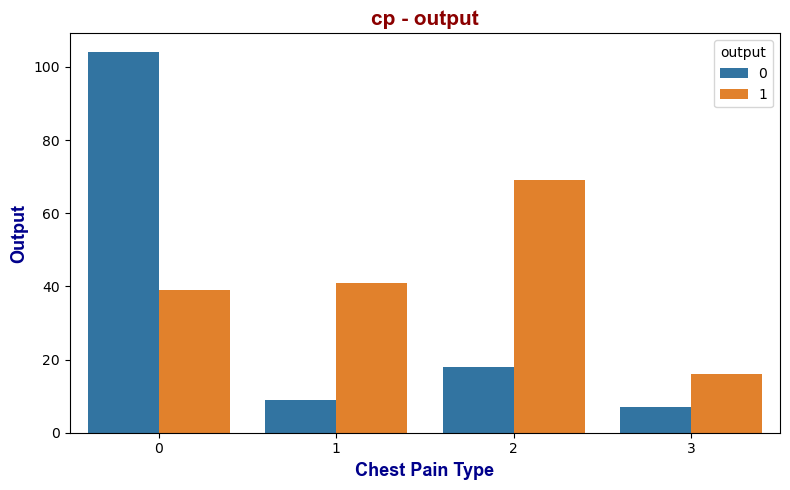

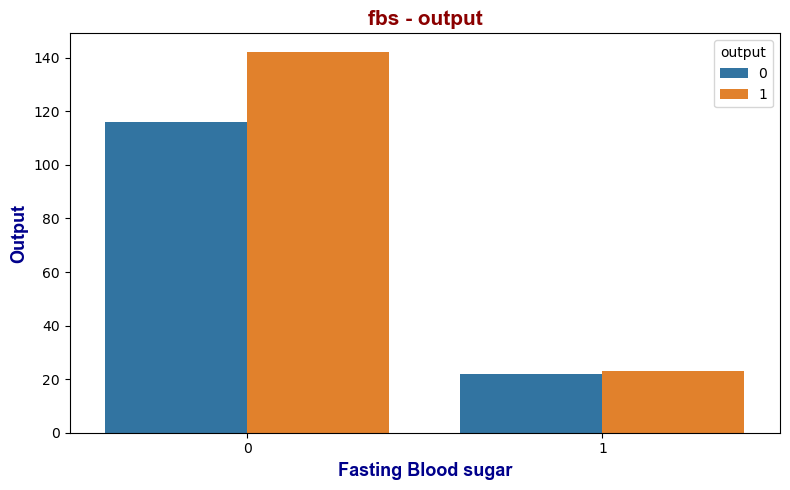

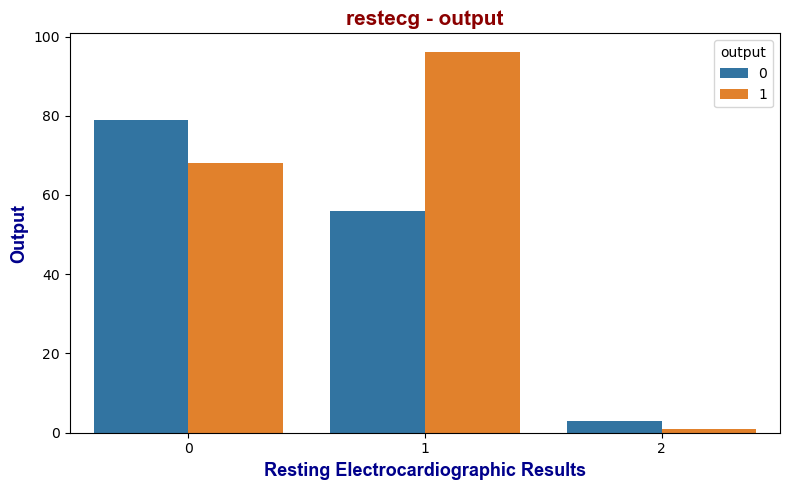

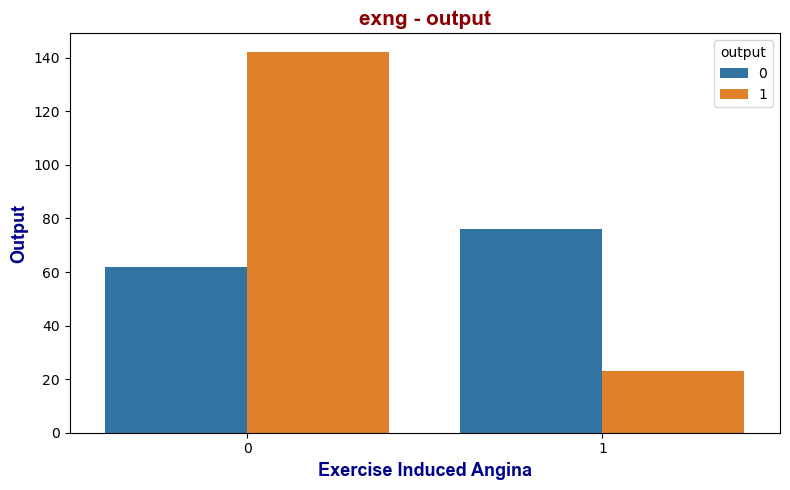

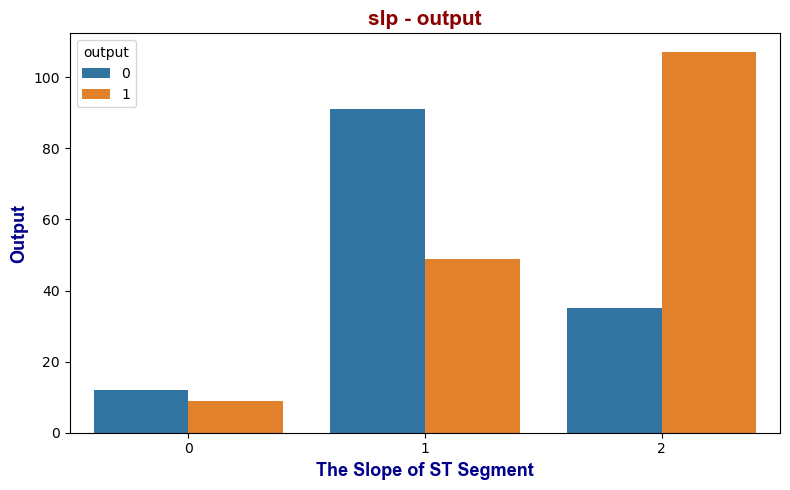

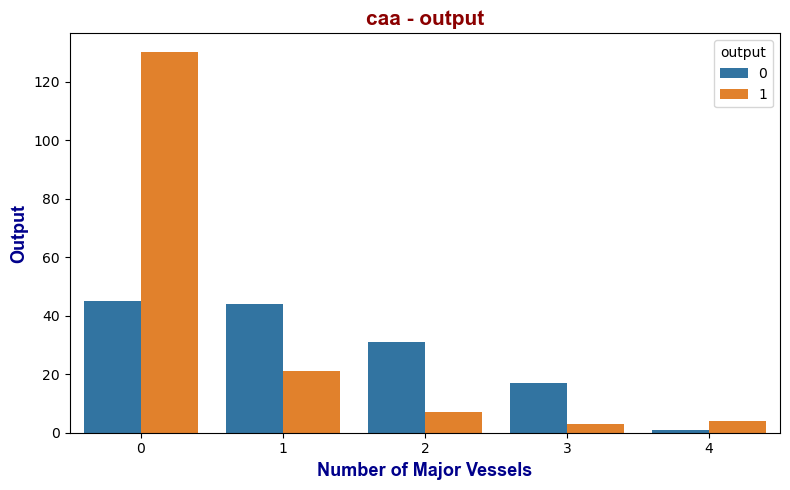

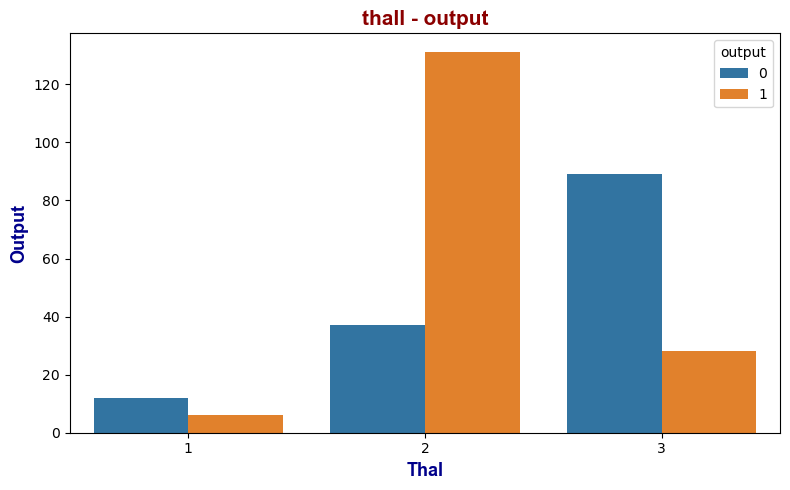

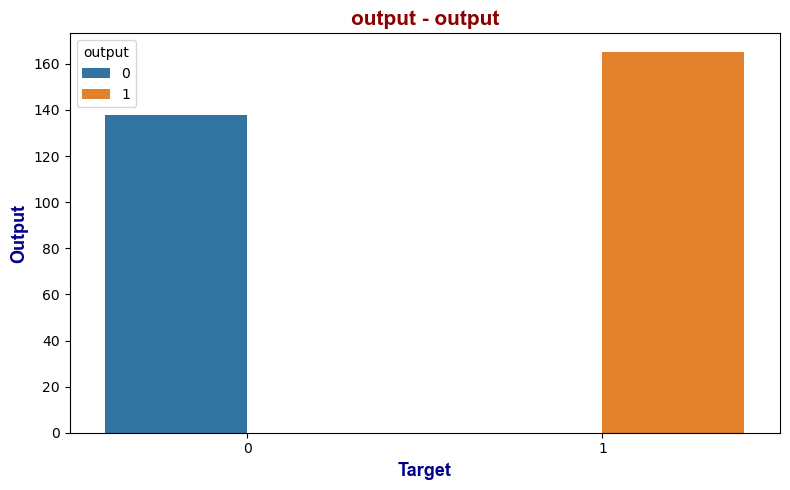

In [52]:
title_font = {"family" : "arial", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"family" : "arial", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i, z in list(zip(categoric_var, categoric_axis_name)):
    plt.figure(figsize = (8, 5))
    sns.countplot(x=i, data=data, hue = "output")
    
    plt.title(i + " - output", fontdict = title_font)
    plt.xlabel(z, fontdict = axis_font)
    plt.ylabel("Output", fontdict = axis_font)
    
    plt.tight_layout()
    plt.show()

In [53]:
data[categoric_var].corr()

sex        cp       fbs   restecg      exng       slp       caa  \
sex      1.000000 -0.049353  0.045032 -0.058196  0.141664 -0.030711  0.118261   
cp      -0.049353  1.000000  0.094444  0.044421 -0.394280  0.119717 -0.181053   
fbs      0.045032  0.094444  1.000000 -0.084189  0.025665 -0.059894  0.137979   
restecg -0.058196  0.044421 -0.084189  1.000000 -0.070733  0.093045 -0.072042   
exng     0.141664 -0.394280  0.025665 -0.070733  1.000000 -0.257748  0.115739   
slp     -0.030711  0.119717 -0.059894  0.093045 -0.257748  1.000000 -0.080155   
caa      0.118261 -0.181053  0.137979 -0.072042  0.115739 -0.080155  1.000000   
thall    0.211652 -0.169125 -0.011209 -0.013795  0.225508 -0.106310  0.143248   
output  -0.280937  0.433798 -0.028046  0.137230 -0.436757  0.345877 -0.391724   

            thall    output  
sex      0.211652 -0.280937  
cp      -0.169125  0.433798  
fbs     -0.011209 -0.028046  
restecg -0.013795  0.137230  
exng     0.225508 -0.436757  
slp     -0.106310  0.345877  
caa      0.143248 -0.391724  
thall    1.000000 -0.363322  
output  -0.363322  1.000000

In [54]:
data[categoric_var].corr().iloc[:, [-1]]

output
sex     -0.280937
cp       0.433798
fbs     -0.028046
restecg  0.137230
exng    -0.436757
slp      0.345877
caa     -0.391724
thall   -0.363322
output   1.000000

Analysis: 

1. Sex-Target(output) Variable: Negative low-intensity correlation.
2. Cp-Target Variable: a positive, moderately strong correlation.
3. Fbs-Target Variable: a very low-intensity correlation in the negative direction 
4. Exang - target : a negative, moderately stong correlation 
5. Slope-Target Variable : a positive, moderately strong correlation
6. ca-target variable: a negative, moderately strong correlation 
7. Thal-Target variable : a negative, moderately strong correlation 


In [55]:
#examining numeric variables among themselves

numeric_var

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'output']

In [56]:
numeric_var.remove("output")

In [57]:
data[numeric_var].head()

age  trtbps  chol  thalachh  oldpeak
0   63     145   233       150      2.3
1   37     130   250       187      3.5
2   41     130   204       172      1.4
3   56     120   236       178      0.8
4   57     120   354       163      0.6

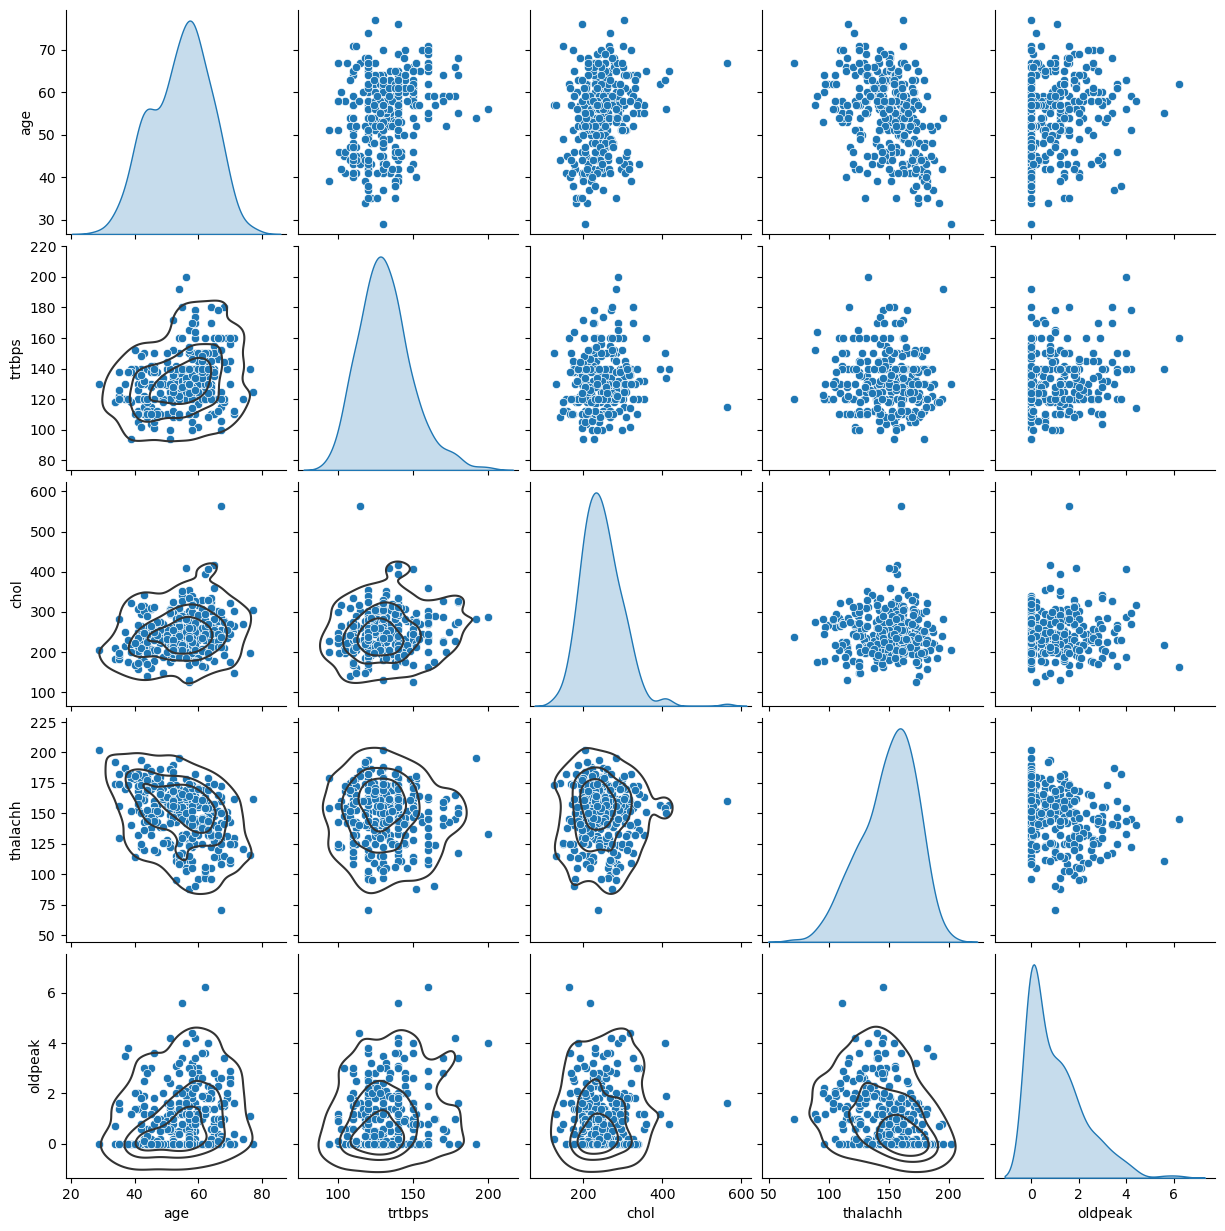

In [58]:
graph = sns.pairplot(data[numeric_var], diag_kind = "kde")
graph.map_lower(sns.kdeplot, levels = 4, color = ".2")
plt.show()

The pair plot allows us to see both distribution of single variables and relationships between two variables. Pair plots are a great method to identify trends for follow-up analysis.

The scatter plot; is a drawing or mathematical diagram that typically uses Cartesian coordinates to display the values of two variables in a dataset. If the points are close to each other and have a regular appearance in terms of their directions, we can say a strong connection between the two variables. There is a directly proportional relationship between two variables in positive directional relationships. An increase in one variable causes an increase in the other variable. In negative relationships, there is an inversely proportional relationship between the variables. When the value of one variable decreases, the other variable also decreases.

1. Age Variable
1.1 The age variable with the most relationship is the "thalach" variable.
1.2 There is a collection of points extending in the southwest direction.
1.3 There is a negative correlation since the points are pointing downwards.
However, since the points are somewhat scattered, this correlation is moderate.

2. Trtbps Variable
2.1 The relationship between "Trtbps" and other variables is weak.
2.2 There is clutter in the graphics in general.
2.3 With the age variable, the dots appear a little more often. 2.4 There is a positive correlation.
The lowest correlation is with the "thalach" variable. The dots are incredibly messy. There is no smooth distribution.

3. Chol Variable
3.1 The variables that have the highest correlation with the variable "chol" are "age" and "trtbps".
3.2However, the relationship between the "age" variable is slightly higher.
3.3 So cholesterol increases with age.
3.4 There is almost no relationship with other variables.

4. Thalach Variable
The age variable has the most relationship with the Thalach variable. There seems to be a moderately negative relationship.
There is not much correlation between the variable "trtbps" and "chol". The dots are too scattered.
When we look at the relationship with the "old peak" variable, we can say a close relationship with the middle level.

5. Oldpeak Variable
We cannot find an explicit expression when interpreting the graphics of this variable because the relationship with all variables is similar to each other.
However, we can say this in general: There is a close relationship with moderate with all variables.

In [59]:
#feature scaling with the RobustScaler Method

In [60]:
from sklearn.preprocessing import RobustScaler

In [61]:
robust_scaler = RobustScaler()

In [62]:
scaled_data = robust_scaler.fit_transform(data[numeric_var])

In [63]:
scaled_data

array([[ 0.59259259,  0.75      , -0.11023622, -0.09230769,  0.9375    ],
       [-1.33333333,  0.        ,  0.15748031,  1.04615385,  1.6875    ],
       [-1.03703704,  0.        , -0.56692913,  0.58461538,  0.375     ],
       ...,
       [ 0.96296296,  0.7       , -0.74015748, -0.36923077,  1.625     ],
       [ 0.14814815,  0.        , -1.71653543, -1.16923077,  0.25      ],
       [ 0.14814815,  0.        , -0.06299213,  0.64615385, -0.5       ]])

In [64]:
type(scaled_data)

numpy.ndarray

In [65]:
df_scaled = pd.DataFrame(scaled_data, columns = numeric_var)
df_scaled.head()

age  trtbps      chol  thalachh  oldpeak
0  0.592593    0.75 -0.110236 -0.092308   0.9375
1 -1.333333    0.00  0.157480  1.046154   1.6875
2 -1.037037    0.00 -0.566929  0.584615   0.3750
3  0.074074   -0.50 -0.062992  0.769231   0.0000
4  0.148148   -0.50  1.795276  0.307692  -0.1250

In [66]:
#creating a new dataframe 

In [67]:
df_new = pd.concat([df_scaled, data.loc[:, "output"]], axis = 1)

In [68]:
df_new.head()

age  trtbps      chol  thalachh  oldpeak  output
0  0.592593    0.75 -0.110236 -0.092308   0.9375       1
1 -1.333333    0.00  0.157480  1.046154   1.6875       1
2 -1.037037    0.00 -0.566929  0.584615   0.3750       1
3  0.074074   -0.50 -0.062992  0.769231   0.0000       1
4  0.148148   -0.50  1.795276  0.307692  -0.1250       1

In [69]:
melted_data = pd.melt(df_new, id_vars = "output", var_name = "variables", value_name = "value")

In [70]:
melted_data

output variables     value
0          1       age  0.592593
1          1       age -1.333333
2          1       age -1.037037
3          1       age  0.074074
4          1       age  0.148148
...      ...       ...       ...
1510       0   oldpeak -0.375000
1511       0   oldpeak  0.250000
1512       0   oldpeak  1.625000
1513       0   oldpeak  0.250000
1514       0   oldpeak -0.500000

[1515 rows x 3 columns]

C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 24.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 38.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 20.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 26.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\seaborn\categori

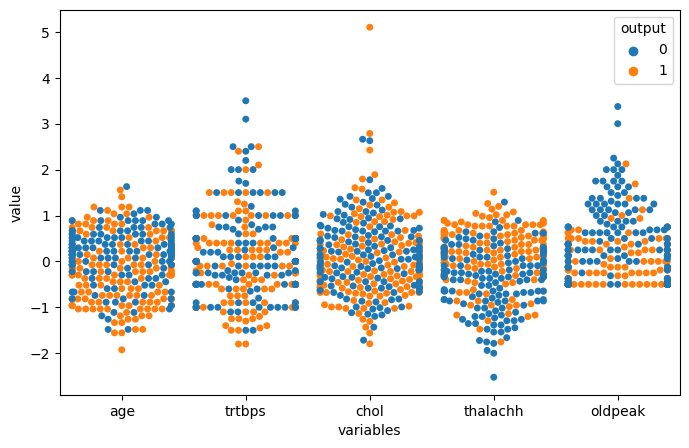

In [71]:
plt.figure(figsize = (8, 5))
sns.swarmplot(x = "variables", y = "value", hue = "output", data = melted_data)
plt.show()

In [72]:
#numeric variables - categorical variables( Analysis with swarm plot)

C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 24.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 38.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 20.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 26.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\seaborn\categori

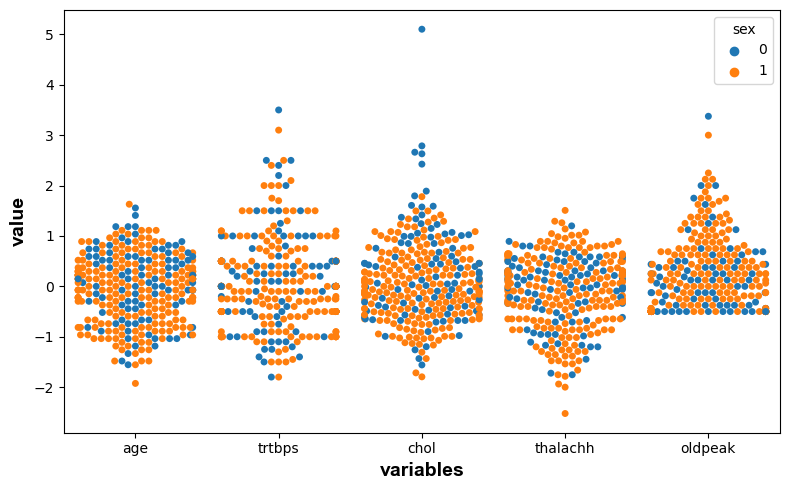

C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 24.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 38.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 20.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 26.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\seaborn\categori

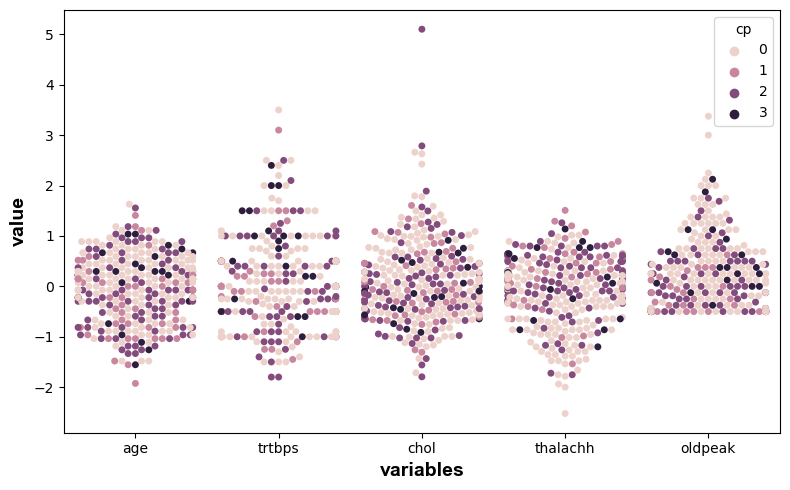

C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 24.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 38.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 20.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 26.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\seaborn\categori

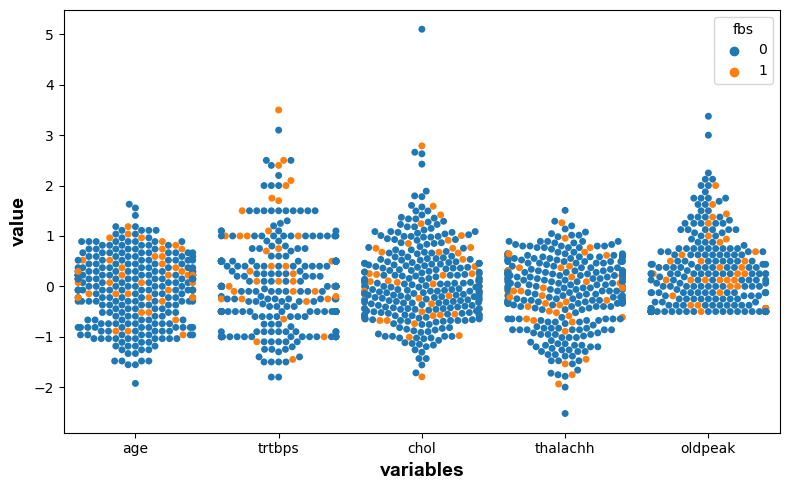

C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 24.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 38.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 20.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 26.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\seaborn\categori

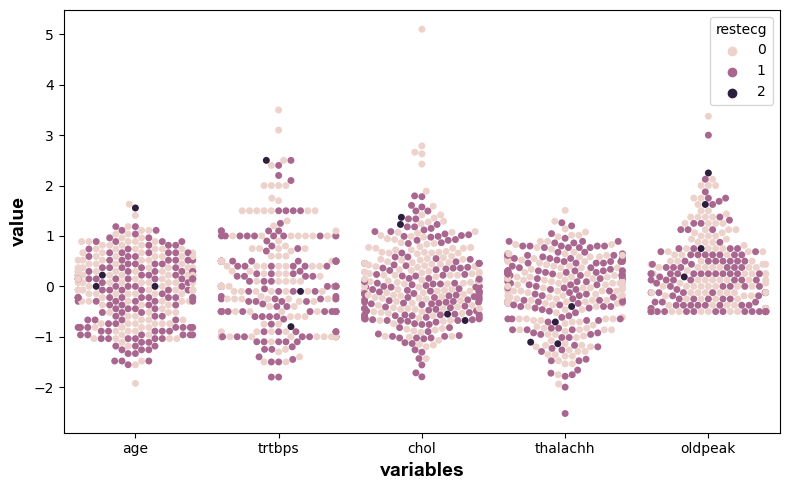

C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 24.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 38.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 20.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 26.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\seaborn\categori

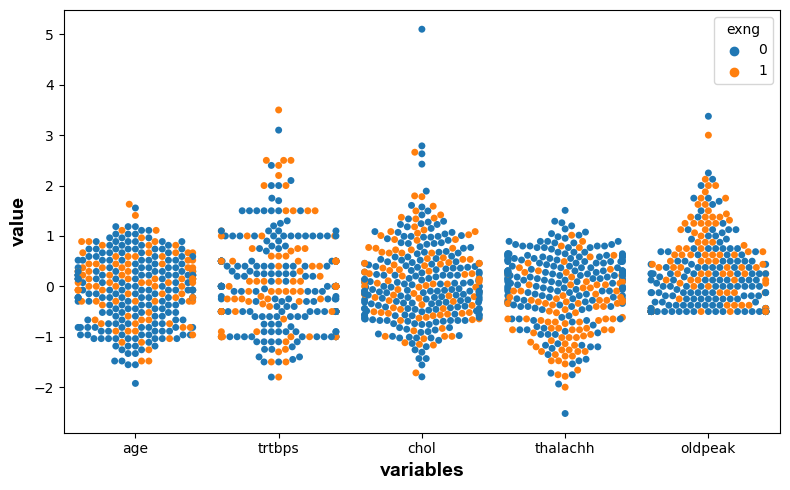

C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 24.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 38.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 20.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 26.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\seaborn\categori

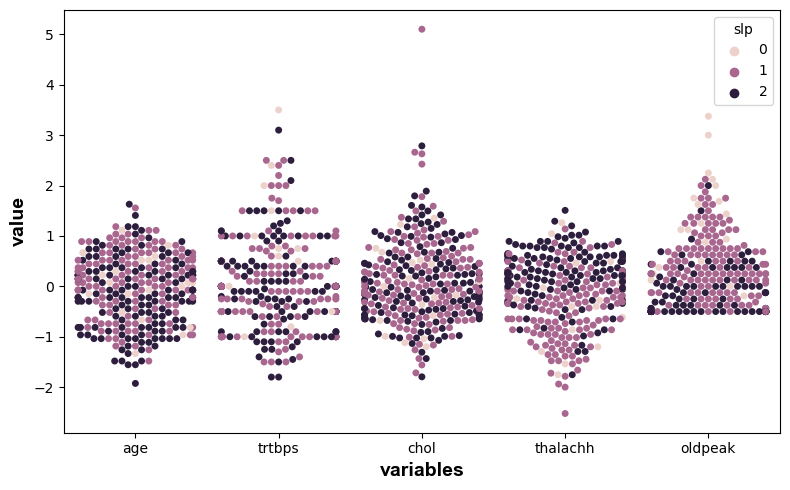

C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 24.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 38.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 20.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 26.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\seaborn\categori

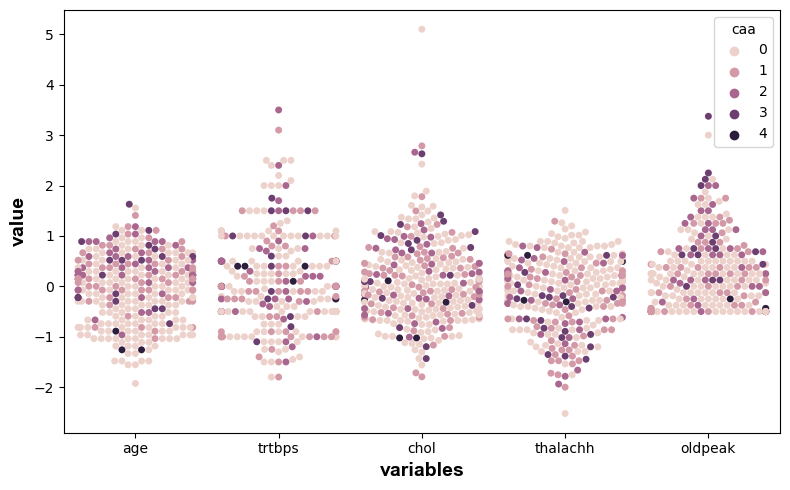

C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 24.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 38.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 20.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 26.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\seaborn\categori

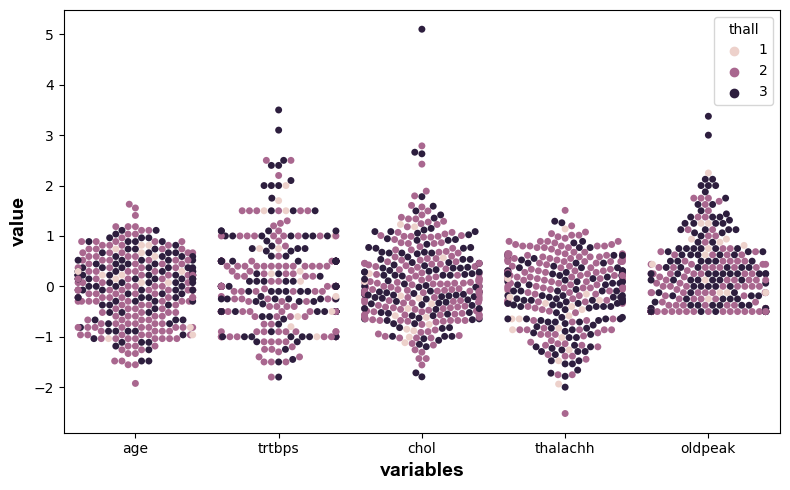

C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 24.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 38.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 20.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 26.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\seaborn\categori

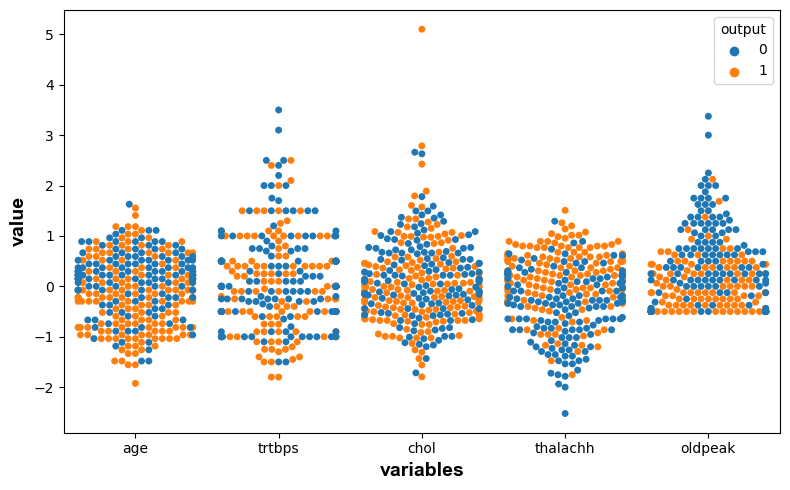

In [73]:
axis_font = {"family" : "arial", "color" : "black", "weight" : "bold", "size" : 14}
for i in data[categoric_var]:
    df_new = pd.concat([df_scaled, data.loc[:, i]], axis = 1)
    melted_data = pd.melt(df_new, id_vars = i, var_name = "variables", value_name = "value")
    
    plt.figure(figsize = (8, 5))
    sns.swarmplot(x = "variables", y = "value", hue = i, data = melted_data)
    
    plt.xlabel("variables", fontdict = axis_font)
    plt.ylabel("value", fontdict = axis_font)
    
    plt.tight_layout()
    plt.show()

In [74]:
#analysis with boxplot 

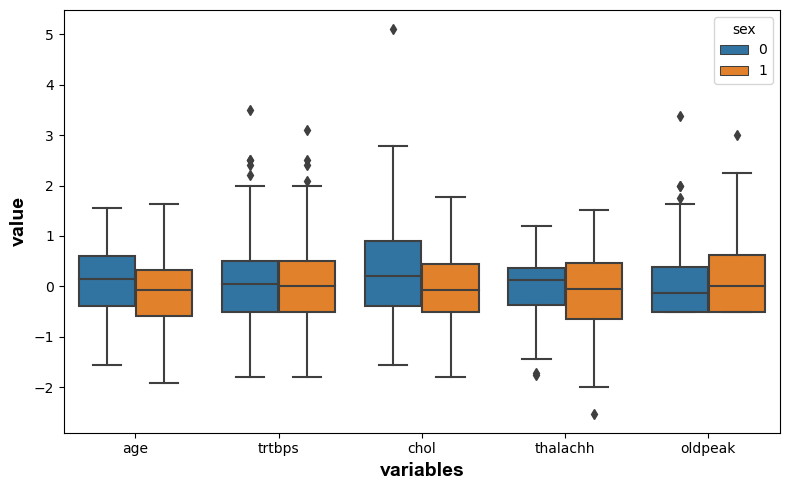

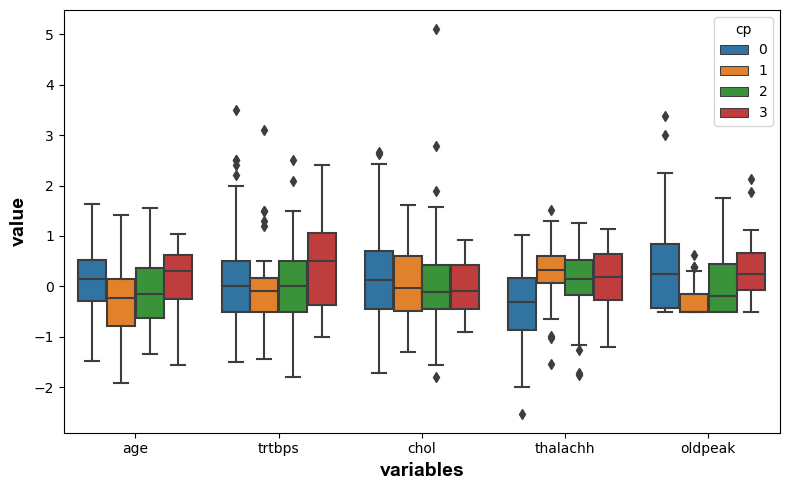

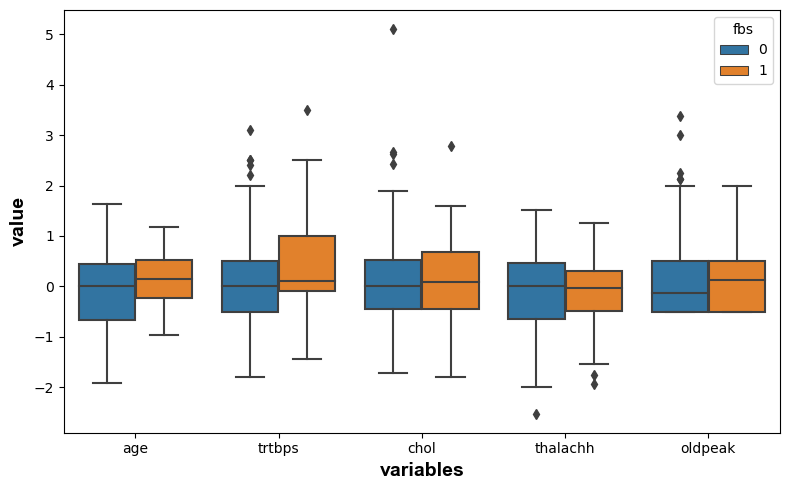

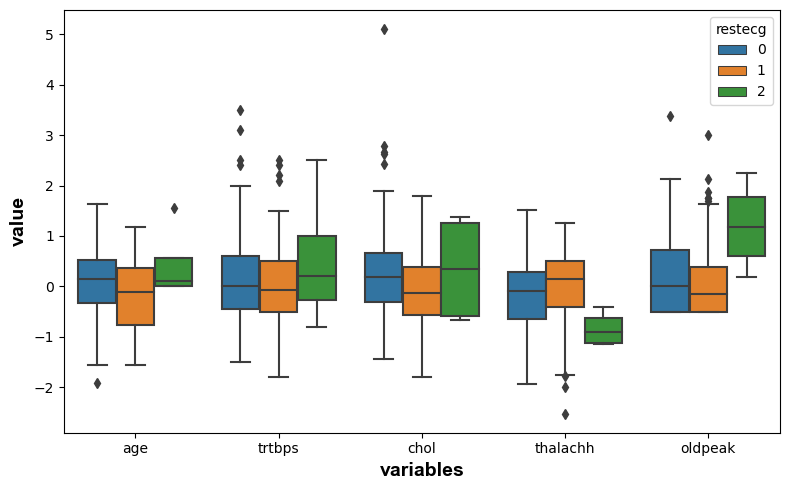

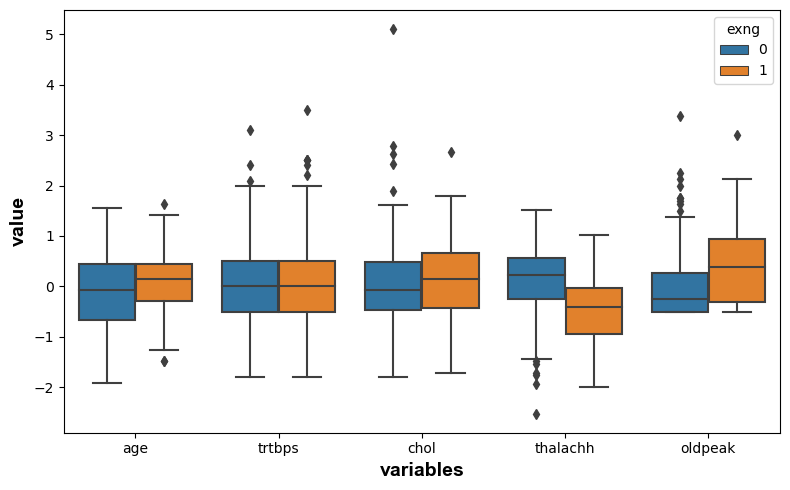

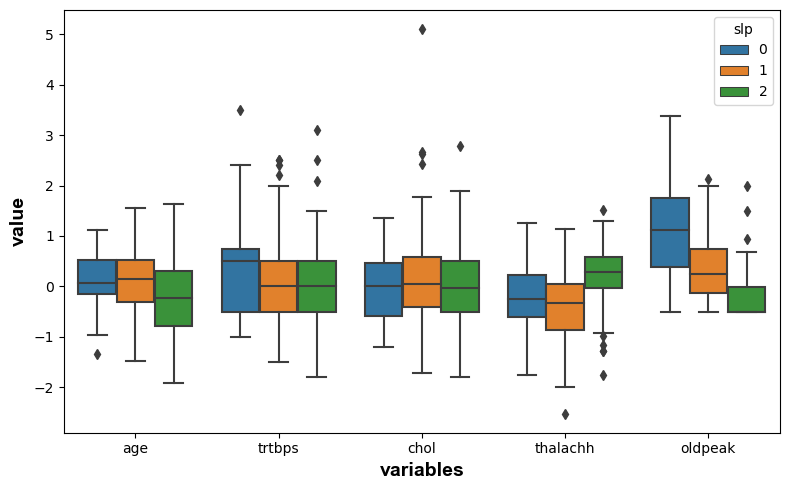

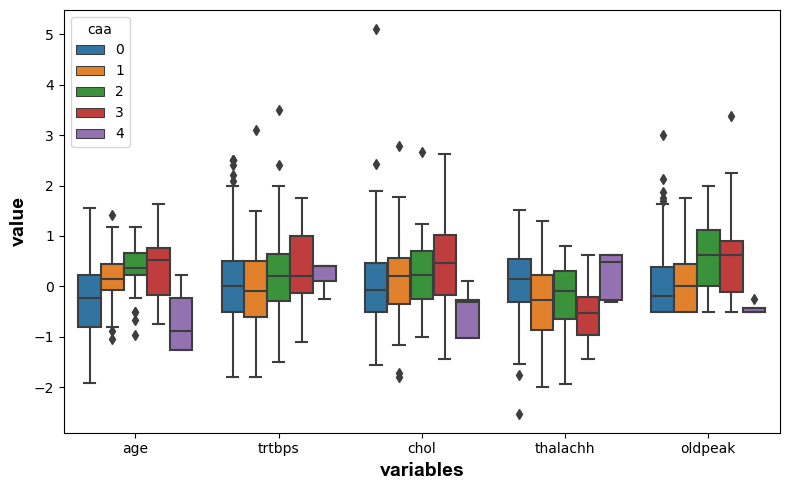

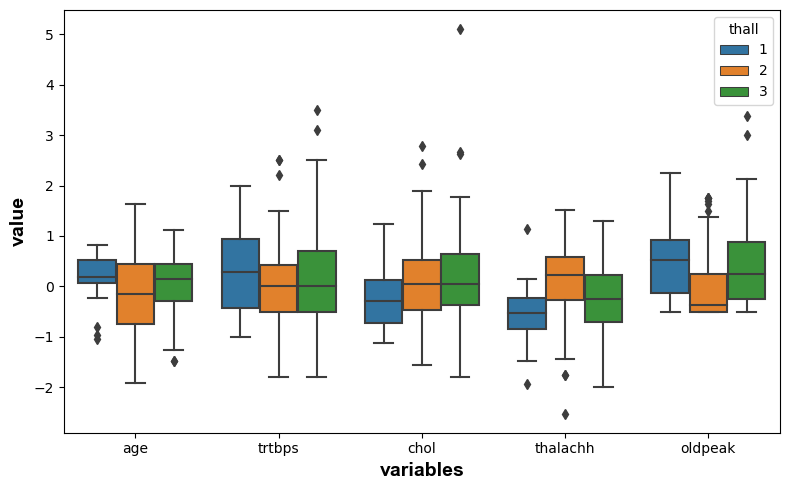

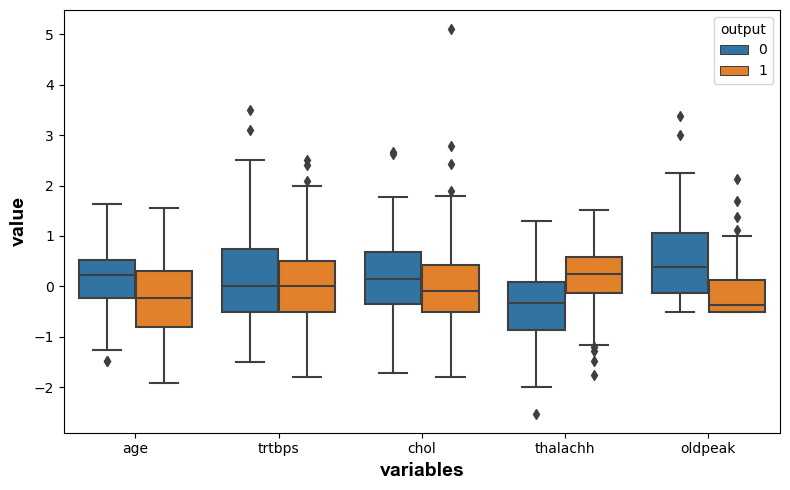

In [75]:
axis_font = {"family" : "arial", "color" : "black", "weight" : "bold", "size" : 14}
for i in data[categoric_var]:
    df_new = pd.concat([df_scaled, data.loc[:, i]], axis = 1)
    melted_data = pd.melt(df_new, id_vars = i, var_name = "variables", value_name = "value")
    
    plt.figure(figsize = (8, 5))
    sns.boxplot(x = "variables", y = "value", hue = i, data = melted_data)
    
    plt.xlabel("variables", fontdict = axis_font)
    plt.ylabel("value", fontdict = axis_font)
    
    plt.tight_layout()
    plt.show()

In [76]:
#analysis with heatmap 

df_scaled

age  trtbps      chol  thalachh  oldpeak
0    0.592593    0.75 -0.110236 -0.092308   0.9375
1   -1.333333    0.00  0.157480  1.046154   1.6875
2   -1.037037    0.00 -0.566929  0.584615   0.3750
3    0.074074   -0.50 -0.062992  0.769231   0.0000
4    0.148148   -0.50  1.795276  0.307692  -0.1250
..        ...     ...       ...       ...      ...
298  0.148148    0.50  0.015748 -0.923077  -0.3750
299 -0.740741   -1.00  0.377953 -0.646154   0.2500
300  0.962963    0.70 -0.740157 -0.369231   1.6250
301  0.148148    0.00 -1.716535 -1.169231   0.2500
302  0.148148    0.00 -0.062992  0.646154  -0.5000

[303 rows x 5 columns]

In [77]:
df_new2 = pd.concat([df_scaled, data[categoric_var]], axis = 1)

In [78]:
df_new2

age  trtbps      chol  thalachh  oldpeak  sex  cp  fbs  restecg  \
0    0.592593    0.75 -0.110236 -0.092308   0.9375    1   3    1        0   
1   -1.333333    0.00  0.157480  1.046154   1.6875    1   2    0        1   
2   -1.037037    0.00 -0.566929  0.584615   0.3750    0   1    0        0   
3    0.074074   -0.50 -0.062992  0.769231   0.0000    1   1    0        1   
4    0.148148   -0.50  1.795276  0.307692  -0.1250    0   0    0        1   
..        ...     ...       ...       ...      ...  ...  ..  ...      ...   
298  0.148148    0.50  0.015748 -0.923077  -0.3750    0   0    0        1   
299 -0.740741   -1.00  0.377953 -0.646154   0.2500    1   3    0        1   
300  0.962963    0.70 -0.740157 -0.369231   1.6250    1   0    1        1   
301  0.148148    0.00 -1.716535 -1.169231   0.2500    1   0    0        1   
302  0.148148    0.00 -0.062992  0.646154  -0.5000    0   1    0        0   

     exng  slp  caa  thall  output  
0       0    0    0      1       1  
1       0    0    0      2       1  
2       0    2    0      2       1  
3       0    2    0      2       1  
4       1    2    0      2       1  
..    ...  ...  ...    ...     ...  
298     1    1    0      3       0  
299     0    1    0      3       0  
300     0    1    2      3       0  
301     1    1    1      3       0  
302     0    1    1      2       0  

[303 rows x 14 columns]

In [79]:
df_new2.corr()

age    trtbps      chol  thalachh   oldpeak       sex  \
age       1.000000  0.279351  0.213678 -0.398522  0.210013 -0.098447   
trtbps    0.279351  1.000000  0.123174 -0.046698  0.193216 -0.056769   
chol      0.213678  0.123174  1.000000 -0.009940  0.053952 -0.197912   
thalachh -0.398522 -0.046698 -0.009940  1.000000 -0.344187 -0.044020   
oldpeak   0.210013  0.193216  0.053952 -0.344187  1.000000  0.096093   
sex      -0.098447 -0.056769 -0.197912 -0.044020  0.096093  1.000000   
cp       -0.068653  0.047608 -0.076904  0.295762 -0.149230 -0.049353   
fbs       0.121308  0.177531  0.013294 -0.008567  0.005747  0.045032   
restecg  -0.116211 -0.114103 -0.151040  0.044123 -0.058770 -0.058196   
exng      0.096801  0.067616  0.067023 -0.378812  0.288223  0.141664   
slp      -0.168814 -0.121475 -0.004038  0.386784 -0.577537 -0.030711   
caa       0.276326  0.101389  0.070511 -0.213177  0.222682  0.118261   
thall     0.066745  0.060638  0.087866 -0.115310  0.210236  0.211652   
output   -0.225439 -0.144931 -0.085239  0.421741 -0.430696 -0.280937   

                cp       fbs   restecg      exng       slp       caa  \
age      -0.068653  0.121308 -0.116211  0.096801 -0.168814  0.276326   
trtbps    0.047608  0.177531 -0.114103  0.067616 -0.121475  0.101389   
chol     -0.076904  0.013294 -0.151040  0.067023 -0.004038  0.070511   
thalachh  0.295762 -0.008567  0.044123 -0.378812  0.386784 -0.213177   
oldpeak  -0.149230  0.005747 -0.058770  0.288223 -0.577537  0.222682   
sex      -0.049353  0.045032 -0.058196  0.141664 -0.030711  0.118261   
cp        1.000000  0.094444  0.044421 -0.394280  0.119717 -0.181053   
fbs       0.094444  1.000000 -0.084189  0.025665 -0.059894  0.137979   
restecg   0.044421 -0.084189  1.000000 -0.070733  0.093045 -0.072042   
exng     -0.394280  0.025665 -0.070733  1.000000 -0.257748  0.115739   
slp       0.119717 -0.059894  0.093045 -0.257748  1.000000 -0.080155   
caa      -0.181053  0.137979 -0.072042  0.115739 -0.080155  1.000000   
thall    -0.169125 -0.011209 -0.013795  0.225508 -0.106310  0.143248   
output    0.433798 -0.028046  0.137230 -0.436757  0.345877 -0.391724   

             thall    output  
age       0.066745 -0.225439  
trtbps    0.060638 -0.144931  
chol      0.087866 -0.085239  
thalachh -0.115310  0.421741  
oldpeak   0.210236 -0.430696  
sex       0.211652 -0.280937  
cp       -0.169125  0.433798  
fbs      -0.011209 -0.028046  
restecg  -0.013795  0.137230  
exng      0.225508 -0.436757  
slp      -0.106310  0.345877  
caa       0.143248 -0.391724  
thall     1.000000 -0.363322  
output   -0.363322  1.000000

<Axes: >

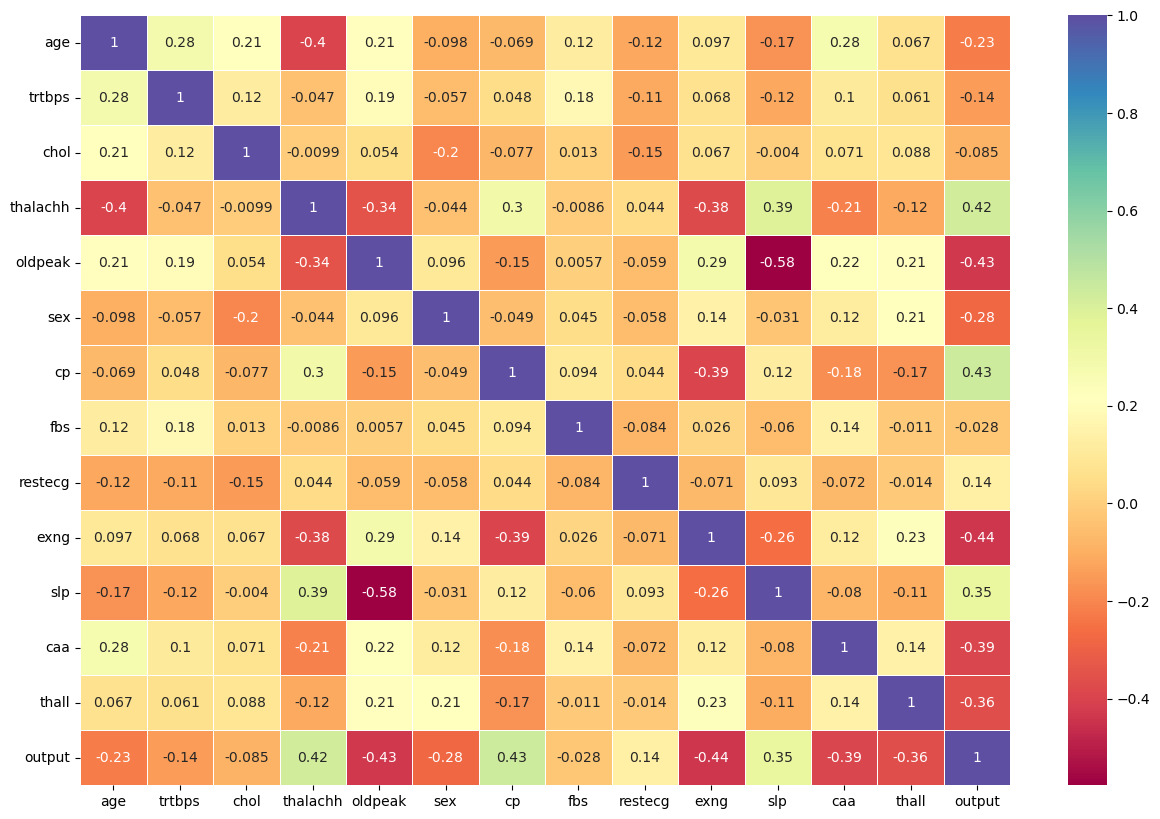

In [80]:
plt.figure(figsize = (15, 10))
sns.heatmap(data = df_new2.corr(), cmap = "Spectral", annot = True, linewidths = 0.5)

### Preparation for modeling

In [81]:
#dropping columns with Low correlation 

In [82]:
data.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [83]:
data.drop(["chol", "fbs", "restecg"], axis = 1, inplace = True)

In [84]:
data.head()

age  sex  cp  trtbps  thalachh  exng  oldpeak  slp  caa  thall  output
0   63    1   3     145       150     0      2.3    0    0      1       1
1   37    1   2     130       187     0      3.5    0    0      2       1
2   41    0   1     130       172     0      1.4    2    0      2       1
3   56    1   1     120       178     0      0.8    2    0      2       1
4   57    0   0     120       163     1      0.6    2    0      2       1

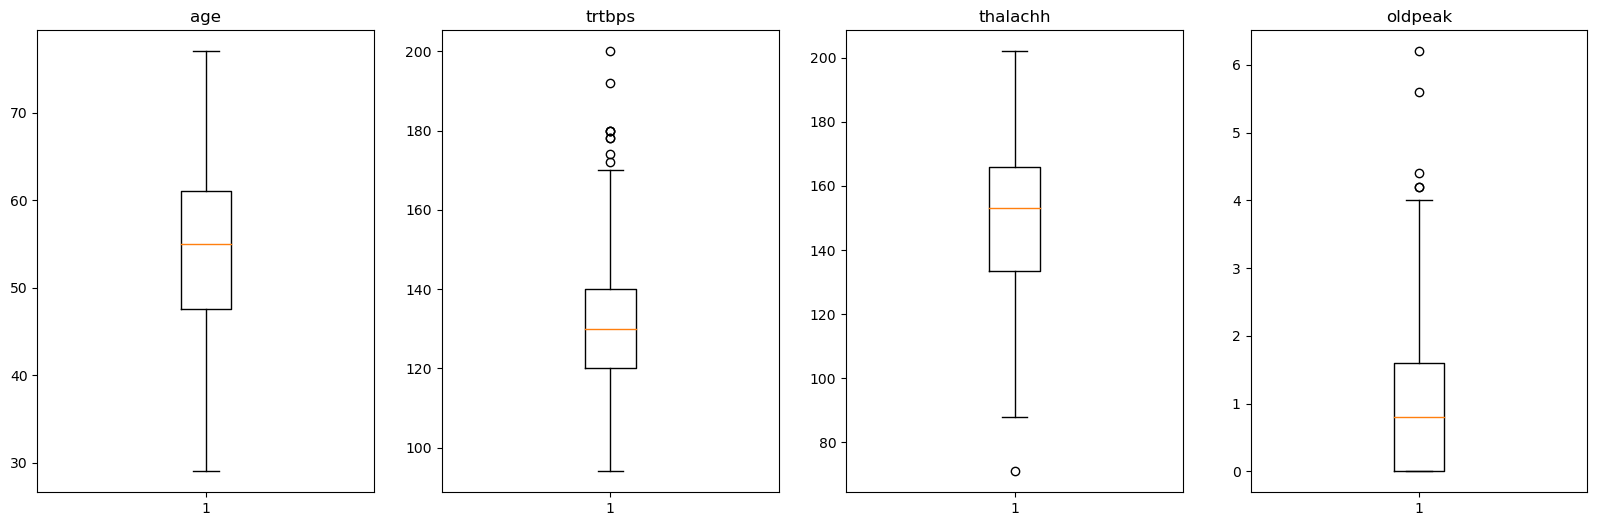

In [85]:
#visualizing outliers 

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20, 6))

ax1.boxplot(data["age"])
ax1.set_title("age")

ax2.boxplot(data["trtbps"])
ax2.set_title("trtbps")

ax3.boxplot(data["thalachh"])
ax3.set_title("thalachh")

ax4.boxplot(data["oldpeak"])
ax4.set_title("oldpeak")

plt.show()


In [86]:
#dealing with outliers 

In [87]:
from scipy import stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize 

In [88]:
z_scores_trtbps = zscore(data["trtbps"])
for threshold in range(1, 4):
    print("Threshold Value: {}".format(threshold))
    print("Number of Outliers: {}".format(len(np.where(z_scores_trtbps > threshold)[0])))
    print("-------------------")

Threshold Value: 1
Number of Outliers: 51
-------------------
Threshold Value: 2
Number of Outliers: 13
-------------------
Threshold Value: 3
Number of Outliers: 2
-------------------


In [89]:
data[z_scores_trtbps > 2][["trtbps"]]

trtbps
8       172
101     178
110     180
152     170
195     170
203     180
223     200
228     170
241     174
248     192
260     178
266     180
292     170

In [90]:
data[z_scores_trtbps > 2].trtbps.min()

170

In [91]:
data[data["trtbps"] < 170].trtbps.max()

165

In [92]:
winsorize_percentile_trtbps = (stats.percentileofscore(data["trtbps"], 165)) / 100
print(winsorize_percentile_trtbps)

0.957095709570957


In [93]:
1 - winsorize_percentile_trtbps

0.04290429042904298

In [94]:
trtbps_winsorize = winsorize(data.trtbps, (0, (1 - winsorize_percentile_trtbps)))

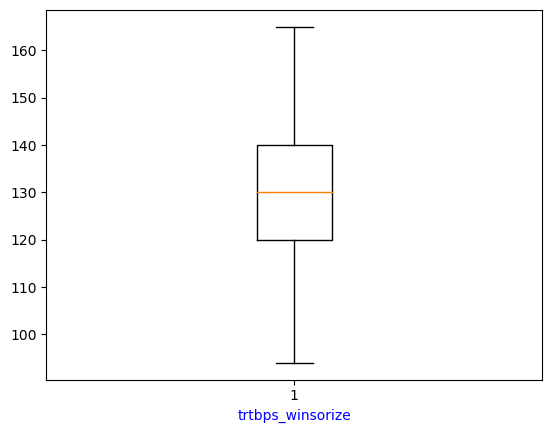

In [95]:
plt.boxplot(trtbps_winsorize)
plt.xlabel("trtbps_winsorize", color = "b")
plt.show()

In [96]:
data["trtbps_winsorize"] = trtbps_winsorize

In [97]:
data.head()

age  sex  cp  trtbps  thalachh  exng  oldpeak  slp  caa  thall  output  \
0   63    1   3     145       150     0      2.3    0    0      1       1   
1   37    1   2     130       187     0      3.5    0    0      2       1   
2   41    0   1     130       172     0      1.4    2    0      2       1   
3   56    1   1     120       178     0      0.8    2    0      2       1   
4   57    0   0     120       163     1      0.6    2    0      2       1   

   trtbps_winsorize  
0               145  
1               130  
2               130  
3               120  
4               120

In [98]:
#thalachh variable 

def iqr(data, var):
    q1 = np.quantile(data[var], 0.25)
    q3 = np.quantile(data[var], 0.75)
    diff = q3 - q1
    lower_v = q1 - (1.5 * diff)
    upper_v = q3 + (1.5 * diff)
    return data[(data[var] < lower_v) | (data[var] > upper_v)]

In [99]:
thalach_out = iqr(data, "thalachh")

In [100]:
thalach_out

age  sex  cp  trtbps  thalachh  exng  oldpeak  slp  caa  thall  output  \
272   67    1   0     120        71     0      1.0    1    0      2       0   

     trtbps_winsorize  
272               120

In [101]:
data.drop([272], axis = 0, inplace = True)

In [102]:
data["thalachh"][270:275]

270    144
271    145
273    156
274    118
275    168
Name: thalachh, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x1f63b070820>,
 'caps': [<matplotlib.lines.Line2D at 0x1f63b070c40>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f63b070580>],
 'medians': [<matplotlib.lines.Line2D at 0x1f63b071180>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f63b071420>],
 'means': []}

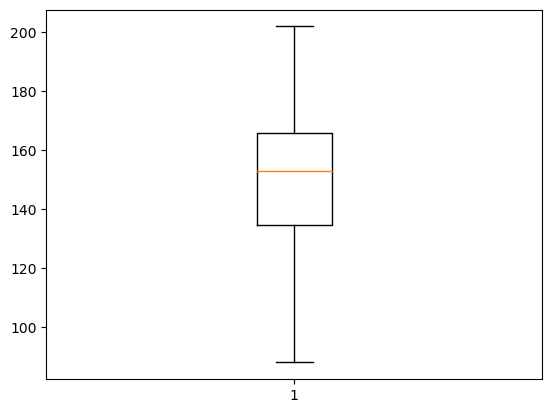

In [103]:
plt.boxplot(data["thalachh"])

In [104]:
#oldpeak variable 

def iqr(data, var):
    q1 = np.quantile(data[var], 0.25)
    q3 = np.quantile(data[var], 0.75)
    diff = q3 - q1
    lower_v = q1 - (1.5 * diff)
    upper_v = q3 + (1.5 * diff)
    return data[(data[var] < lower_v) | (data[var] > upper_v)]

In [105]:
iqr(data, "oldpeak")

age  sex  cp  trtbps  thalachh  exng  oldpeak  slp  caa  thall  output  \
101   59    1   3     178       145     0      4.2    0    0      3       1   
204   62    0   0     160       145     0      6.2    0    3      3       0   
221   55    1   0     140       111     1      5.6    0    0      3       0   
250   51    1   0     140       122     1      4.2    1    3      3       0   
291   58    1   0     114       140     0      4.4    0    3      1       0   

     trtbps_winsorize  
101               165  
204               160  
221               140  
250               140  
291               114

In [106]:
data[data["oldpeak"] < 4.2].oldpeak.max()

4.0

In [107]:
winsorize_percentile_oldpeak = (stats.percentileofscore(data["oldpeak"], 4)) / 100
print(winsorize_percentile_oldpeak)

0.980132450331126


In [108]:
oldpeak_winsorize = winsorize(data.oldpeak, (0, (1 - winsorize_percentile_oldpeak)))

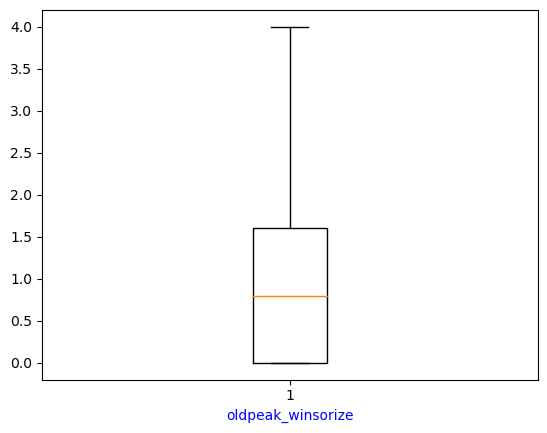

In [109]:
plt.boxplot(oldpeak_winsorize)
plt.xlabel("oldpeak_winsorize", color = "b")
plt.show()

In [110]:
data["oldpeak_winsorize"] = oldpeak_winsorize

In [111]:
data.head()

age  sex  cp  trtbps  thalachh  exng  oldpeak  slp  caa  thall  output  \
0   63    1   3     145       150     0      2.3    0    0      1       1   
1   37    1   2     130       187     0      3.5    0    0      2       1   
2   41    0   1     130       172     0      1.4    2    0      2       1   
3   56    1   1     120       178     0      0.8    2    0      2       1   
4   57    0   0     120       163     1      0.6    2    0      2       1   

   trtbps_winsorize  oldpeak_winsorize  
0               145                2.3  
1               130                3.5  
2               130                1.4  
3               120                0.8  
4               120                0.6

In [112]:
data.drop(["trtbps", "oldpeak"], axis = 1, inplace = True)

In [113]:
data.head()

age  sex  cp  thalachh  exng  slp  caa  thall  output  trtbps_winsorize  \
0   63    1   3       150     0    0    0      1       1               145   
1   37    1   2       187     0    0    0      2       1               130   
2   41    0   1       172     0    2    0      2       1               130   
3   56    1   1       178     0    2    0      2       1               120   
4   57    0   0       163     1    2    0      2       1               120   

   oldpeak_winsorize  
0                2.3  
1                3.5  
2                1.4  
3                0.8  
4                0.6

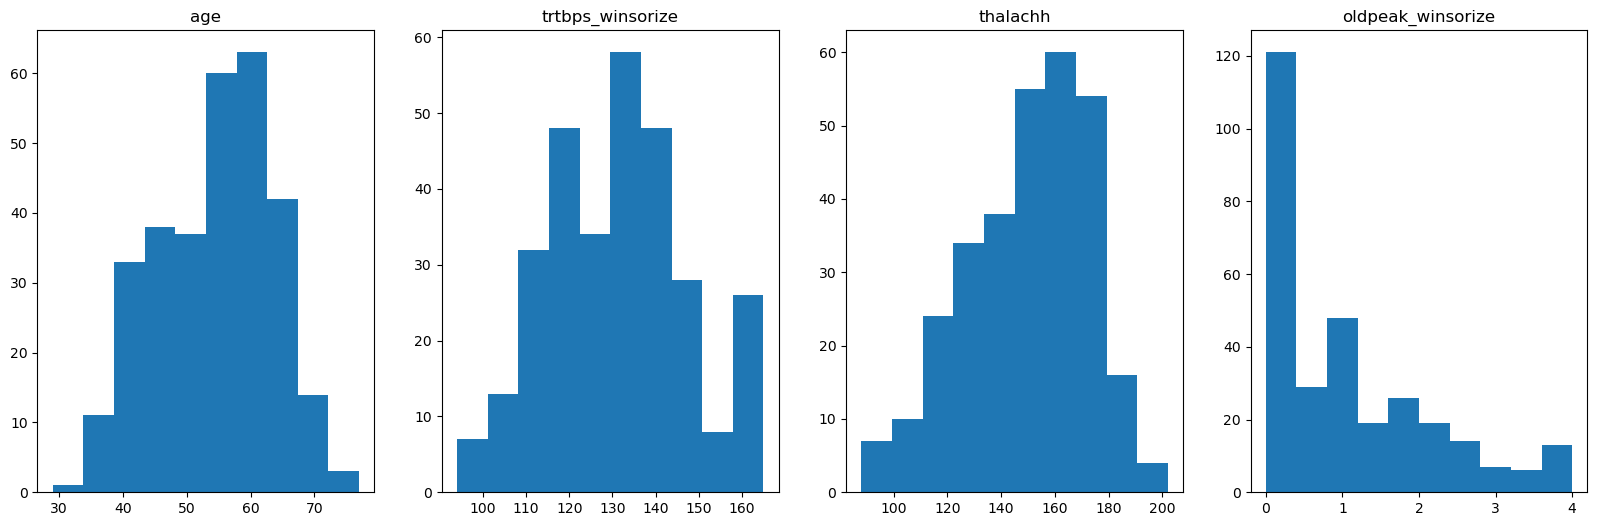

In [114]:
#examining distributions of numeric_Var

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20, 6))

ax1.hist(data["age"])
ax1.set_title("age")

ax2.hist(data["trtbps_winsorize"])
ax2.set_title("trtbps_winsorize")

ax3.hist(data["thalachh"])
ax3.set_title("thalachh")

ax4.hist(data["oldpeak_winsorize"])
ax4.set_title("oldpeak_winsorize")

plt.show()

In [115]:
data[["age", "trtbps_winsorize", "thalachh", "oldpeak_winsorize"]].agg(["skew"]).transpose()

skew
age               -0.199209
trtbps_winsorize   0.251969
thalachh          -0.461611
oldpeak_winsorize  0.996036

## Transformation operations on Unsymmetrical Data

In [116]:
data["oldpeak_winsorize_log"] = np.log(data["oldpeak_winsorize"])
data["oldpeak_winsorize_sqrt"] = np.sqrt(data["oldpeak_winsorize"])

C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [117]:
data.head()

age  sex  cp  thalachh  exng  slp  caa  thall  output  trtbps_winsorize  \
0   63    1   3       150     0    0    0      1       1               145   
1   37    1   2       187     0    0    0      2       1               130   
2   41    0   1       172     0    2    0      2       1               130   
3   56    1   1       178     0    2    0      2       1               120   
4   57    0   0       163     1    2    0      2       1               120   

   oldpeak_winsorize  oldpeak_winsorize_log  oldpeak_winsorize_sqrt  
0                2.3               0.832909                1.516575  
1                3.5               1.252763                1.870829  
2                1.4               0.336472                1.183216  
3                0.8              -0.223144                0.894427  
4                0.6              -0.510826                0.774597

In [118]:
data[["oldpeak_winsorize", "oldpeak_winsorize_log", "oldpeak_winsorize_sqrt"]].agg(["skew"]).transpose()

skew
oldpeak_winsorize       0.996036
oldpeak_winsorize_log        NaN
oldpeak_winsorize_sqrt  0.108926

In [119]:
data.drop(["oldpeak_winsorize", "oldpeak_winsorize_log"], axis = 1, inplace = True)

In [120]:
data.head()

age  sex  cp  thalachh  exng  slp  caa  thall  output  trtbps_winsorize  \
0   63    1   3       150     0    0    0      1       1               145   
1   37    1   2       187     0    0    0      2       1               130   
2   41    0   1       172     0    2    0      2       1               130   
3   56    1   1       178     0    2    0      2       1               120   
4   57    0   0       163     1    2    0      2       1               120   

   oldpeak_winsorize_sqrt  
0                1.516575  
1                1.870829  
2                1.183216  
3                0.894427  
4                0.774597

In [121]:
## applying one hot encoding method to categorical variables 

df_copy = data.copy()

In [122]:
df_copy.head()

age  sex  cp  thalachh  exng  slp  caa  thall  output  trtbps_winsorize  \
0   63    1   3       150     0    0    0      1       1               145   
1   37    1   2       187     0    0    0      2       1               130   
2   41    0   1       172     0    2    0      2       1               130   
3   56    1   1       178     0    2    0      2       1               120   
4   57    0   0       163     1    2    0      2       1               120   

   oldpeak_winsorize_sqrt  
0                1.516575  
1                1.870829  
2                1.183216  
3                0.894427  
4                0.774597

In [123]:
categoric_var

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

In [124]:
categoric_var.remove("fbs")
categoric_var.remove("restecg")

In [125]:
categoric_var

['sex', 'cp', 'exng', 'slp', 'caa', 'thall', 'output']

In [126]:
df_copy = pd.get_dummies(df_copy, columns = categoric_var[:-1], drop_first = True)

In [127]:
df_copy.head()

age  thalachh  output  trtbps_winsorize  oldpeak_winsorize_sqrt  sex_1  \
0   63       150       1               145                1.516575      1   
1   37       187       1               130                1.870829      1   
2   41       172       1               130                1.183216      0   
3   56       178       1               120                0.894427      1   
4   57       163       1               120                0.774597      0   

   cp_1  cp_2  cp_3  exng_1  slp_1  slp_2  caa_1  caa_2  caa_3  caa_4  \
0     0     0     1       0      0      0      0      0      0      0   
1     0     1     0       0      0      0      0      0      0      0   
2     1     0     0       0      0      1      0      0      0      0   
3     1     0     0       0      0      1      0      0      0      0   
4     0     0     0       1      0      1      0      0      0      0   

   thall_2  thall_3  
0        0        0  
1        1        0  
2        1        0  
3        1        0  
4        1        0

In [128]:
#feature scaling with the Robustscaler method for Machine learning algorithms 

new_numeric_var = ["age", "thalachh", "trtbps_winsorize", "oldpeak_winsorize_sqrt"]

In [129]:
robus_scaler = RobustScaler()

In [130]:
df_copy[new_numeric_var] = robust_scaler.fit_transform(df_copy[new_numeric_var])

In [131]:
df_copy.head()

age  thalachh  output  trtbps_winsorize  oldpeak_winsorize_sqrt  \
0  0.581818 -0.095238       1              0.75                0.491851   
1 -1.309091  1.079365       1              0.00                0.771913   
2 -1.018182  0.603175       1              0.00                0.228308   
3  0.072727  0.793651       1             -0.50                0.000000   
4  0.145455  0.317460       1             -0.50               -0.094734   

   sex_1  cp_1  cp_2  cp_3  exng_1  slp_1  slp_2  caa_1  caa_2  caa_3  caa_4  \
0      1     0     0     1       0      0      0      0      0      0      0   
1      1     0     1     0       0      0      0      0      0      0      0   
2      0     1     0     0       0      0      1      0      0      0      0   
3      1     1     0     0       0      0      1      0      0      0      0   
4      0     0     0     0       1      0      1      0      0      0      0   

   thall_2  thall_3  
0        0        0  
1        1        0  
2        1        0  
3        1        0  
4        1        0

## Separating Data into Test and Training set 

In [132]:
from sklearn.model_selection import train_test_split

In [133]:
X = df_copy.drop(["output"], axis = 1)
y = df_copy[["output"]]

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 3)

In [135]:
X_train.head()

age  thalachh  trtbps_winsorize  oldpeak_winsorize_sqrt  sex_1  \
201  0.363636 -0.380952             -0.25                0.615769      1   
82   0.363636  0.222222             -1.40               -0.707107      0   
187 -0.072727 -1.396825             -0.30                0.465497      1   
259 -1.236364  0.920635             -0.50                0.833997      1   
5    0.145455 -0.158730              0.50               -0.207107      1   

     cp_1  cp_2  cp_3  exng_1  slp_1  slp_2  caa_1  caa_2  caa_3  caa_4  \
201     0     0     0       1      1      0      1      0      0      0   
82      0     1     0       0      0      1      1      0      0      0   
187     0     0     0       1      1      0      1      0      0      0   
259     0     0     1       1      1      0      0      0      0      0   
5       0     0     0       0      1      0      0      0      0      0   

     thall_2  thall_3  
201        0        1  
82         1        0  
187        0        1  
259        0        1  
5          0        0

In [136]:
y_train.head()

output
201       0
82        1
187       0
259       0
5         1

In [137]:
print(f"X_train: {X_train.shape[0]}")
print(f"X_test: {X_test.shape[0]}")
print(f"y_train: {y_train.shape[0]}")
print(f"y_test: {y_test.shape[0]}")

X_train: 271
X_test: 31
y_train: 271
y_test: 31


## Modelling
### Logistic regression algorithm 

In [138]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [139]:
log_reg = LogisticRegression()
log_reg

LogisticRegression()

In [140]:
log_reg.fit(X_train, y_train)

C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [141]:
y_pred = log_reg.predict(X_test)

In [142]:
y_pred

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [143]:
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: {}".format(accuracy))

Test Accuracy: 0.8709677419354839


### Cross Validation 

In [144]:
from sklearn.model_selection import cross_val_score

In [145]:
scores = cross_val_score(log_reg, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.8666666666666666


C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y 

### Hyperparameter optimization ( with GridSearchCV)

In [146]:
from sklearn.model_selection import GridSearchCV

In [147]:
log_reg_new = LogisticRegression()
log_reg_new

LogisticRegression()

In [148]:
parameters = {"penalty":["l1","l2"], "solver" : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [149]:
log_reg_grid = GridSearchCV(log_reg_new, param_grid = parameters)

In [150]:
log_reg_grid.fit(X_train, y_train)

C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [151]:
print("Best Parameters: ", log_reg_grid.best_params_)

Best Parameters:  {'penalty': 'l1', 'solver': 'saga'}


In [152]:
log_reg_new2 = LogisticRegression(penalty = "l1", solver = "saga")
log_reg_new2

LogisticRegression(penalty='l1', solver='saga')

In [153]:
log_reg_new2.fit(X_train, y_train)

C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(penalty='l1', solver='saga')

In [154]:
y_pred = log_reg_new2.predict(X_test)

In [155]:
print("The test accuracy score of Logistic Regression After hyper-parameter tuning is: {}".format(accuracy_score(y_test, y_pred)))

The test accuracy score of Logistic Regression After hyper-parameter tuning is: 0.8709677419354839


### Decision tree algorithm

In [156]:
from sklearn.tree import DecisionTreeClassifier

In [157]:
dec_tree = DecisionTreeClassifier(random_state = 5)

In [158]:
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=5)

In [159]:
y_pred = dec_tree.predict(X_test)

In [160]:
print("The test accuracy score of Decision Tree is:", accuracy_score(y_test, y_pred))

The test accuracy score of Decision Tree is: 0.8387096774193549


In [161]:
scores = cross_val_score(dec_tree, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.8333333333333333


C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


### Support vector machine algorithm

In [162]:
from sklearn.svm import SVC

In [163]:
svc_model = SVC(random_state = 5)

In [164]:
svc_model.fit(X_train, y_train)

C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(random_state=5)

In [165]:
y_pred = svc_model.predict(X_test)

In [166]:
print("The test accuracy score of SVM is:", accuracy_score(y_test, y_pred))

The test accuracy score of SVM is: 0.8709677419354839


In [167]:
scores = cross_val_score(svc_model, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.8333333333333334


C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y 

### Random Forest Algorithm 

In [168]:
from sklearn.ensemble import RandomForestClassifier

In [169]:
random_forest = RandomForestClassifier(random_state = 5)

In [170]:
random_forest.fit(X_train, y_train)

C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=5)

In [171]:
y_pred = random_forest.predict(X_test)

In [172]:
print("The test accuracy score of Random Forest is", accuracy_score(y_test, y_pred))

The test accuracy score of Random Forest is 0.8387096774193549


In [173]:
scores = cross_val_score(random_forest, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_

Cross-Validation Accuracy Scores 0.8999999999999998


### Hyperparameter Optimization

In [174]:
random_forest_new = RandomForestClassifier(random_state = 5)
random_forest_new

RandomForestClassifier(random_state=5)

In [175]:
parameters = {"n_estimators" : [50, 100, 150, 200], 
              "criterion" : ["gini", "entropy"], 
              'max_features': ['auto', 'sqrt', 'log2'], 
              'bootstrap': [True, False]}

In [176]:
random_forest_grid = GridSearchCV(random_forest_new, param_grid = parameters)

In [177]:
random_forest_grid.fit(X_train, y_train)

C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Harip\anaconda3\Anaconda\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

GridSearchCV(estimator=RandomForestClassifier(random_state=5),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200]})

In [178]:
print("Best Parameters:", random_forest_grid.best_params_)

Best Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 200}


In [179]:
random_forest_new2 = RandomForestClassifier(bootstrap = True, criterion = "entropy", max_features = "auto", n_estimators = 200, random_state = 5)

In [187]:
print("The test accuracy score of Random Forest after hyper-parameter tuning is:", accuracy_score(y_test, y_pred))

The test accuracy score of Random Forest after hyper-parameter tuning is: 0.8387096774193549
